# Introduzione

## Contesto
__Task__

L'analisi della personalità del cliente è un'analisi dettagliata dei clienti ideali di un'azienda. Aiuta un'azienda a comprendere meglio i propri clienti e rende più facile per loro modificare i prodotti in base alle esigenze, ai comportamenti e alle preoccupazioni specifici dei diversi tipi di clienti.


## Contenuto del Dataset
__Feature__

Persone

- ID: identificativo univoco del cliente
- Year_Birth: anno di nascita del cliente
- Education: livello di istruzione del cliente
- Marital_Status: stato civile del cliente
- Income: reddito familiare annuo del cliente
- Kidhome: numero di bambini nella famiglia del cliente
- Teenhome: numero di adolescenti nella famiglia del cliente
- Dt_Customer: data di registrazione del cliente con l'azienda
- Recency: numero di giorni dall'ultimo acquisto del cliente
- Complain: 1 se il cliente si è lamentato negli ultimi 2 anni, 0 altrimenti

Prodotti

- MntWines: importo speso in vino negli ultimi 2 anni
- MntFruits: importo speso in frutta negli ultimi 2 anni
- MntMeatProducts: importo speso in carne negli ultimi 2 anni
- MntFishProducts: importo speso in pesce negli ultimi 2 anni
- MntSweetProducts: importo speso in dolci negli ultimi 2 anni
- MntGoldProds: importo speso in oro negli ultimi 2 anni

Promzione

- NumDealsPurchases: numero di acquisti effettuati con uno sconto
- AcceptedCmp1: 1 se il cliente ha accettato l'offerta nella prima campagna, 0 altrimenti
- AcceptedCmp2: 1 se il cliente ha accettato l'offerta nella seconda campagna, 0 altrimenti
- AcceptedCmp3: 1 se il cliente ha accettato l'offerta nella terza campagna, 0 altrimenti
- AcceptedCmp4: 1 se il cliente ha accettato l'offerta nella quarta campagna, 0 altrimenti
- AcceptedCmp5: 1 se il cliente ha accettato l'offerta nella quinta campagna, 0 altrimenti
- Response: 1 se il cliente ha accettato l'offerta nell'ultima campagna, 0 altrimenti

Fonte

- NumWebPurchases: numero di acquisti effettuati tramite il sito web dell'azienda
- NumCatalogPurchases: numero di acquisti effettuati usando il catalogo
- NumStorePurchases: numero di acquisti effettuati nei negozi
- NumWebVisitsMonth: numero di visite al sito web dell'azienda nell'ultimo mese

Target

- E' necessario individuare i cluster in cui è possibile suddividere gli esempi

# Import librerie

In [1]:
!pip install sklearn_pandas

!pip install yellowbrick

!pip install plotly

import numpy as np

import pandas as pd

from matplotlib import pyplot as plt

import seaborn as sns

import plotly.express as px

from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

from sklearn_pandas import DataFrameMapper, gen_features

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

#sns.set_theme()

PALETTE = sns.color_palette("Set2")

sns.set_context("paper", rc={"font.size":12, 
                             "figure.titlesize":18, 
                             "axes.titlesize":15, 
                             "axes.labelsize":13, 
                             "xtick.labelsize": 13,
                             "ytick.labelsize": 13,
                             "legend.fontsize": 9,
                             "legend.title_fontsize": 11}) 

/Users/fabriziatagliaferri/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


# Analisi Esplorativa

In [2]:
data = pd.read_csv('marketing_campaign.csv', sep='\t', 
                   index_col='ID', 
                   parse_dates=['Dt_Customer'])

In [3]:
data.head(10)

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
ID                                                                        
5524        1957  Graduation         Single  58138.0        0         0   
2174        1954  Graduation         Single  46344.0        1         1   
4141        1965  Graduation       Together  71613.0        0         0   
6182        1984  Graduation       Together  26646.0        1         0   
5324        1981         PhD        Married  58293.0        1         0   
7446        1967      Master       Together  62513.0        0         1   
965         1971  Graduation       Divorced  55635.0        0         1   
6177        1985         PhD        Married  33454.0        1         0   
4855        1974         PhD       Together  30351.0        1         0   
5899        1950         PhD       Together   5648.0        1         1   

     Dt_Customer  Recency  MntWines  MntFruits  ...  NumWebVisitsMonth  \
ID                                              ...                      
5524  2012-04-09       58       635         88  ...                  7   
2174  2014-08-03       38        11          1  ...                  5   
4141  2013-08-21       26       426         49  ...                  4   
6182  2014-10-02       26        11          4  ...                  6   
5324  2014-01-19       94       173         43  ...                  5   
7446  2013-09-09       16       520         42  ...                  6   
965   2012-11-13       34       235         65  ...                  6   
6177  2013-08-05       32        76         10  ...                  8   
4855  2013-06-06       19        14          0  ...                  9   
5899  2014-03-13       68        28          0  ...                 20   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
ID                                                                           
5524             0             0             0             0             0   
2174             0             0             0             0             0   
4141             0             0             0             0             0   
6182             0             0             0             0             0   
5324             0             0             0             0             0   
7446             0             0             0             0             0   
965              0             0             0             0             0   
6177             0             0             0             0             0   
4855             0             0             0             0             0   
5899             1             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
ID                                                  
5524         0              3         11         1  
2174         0              3         11         0  
4141         0              3         11         0  
6182         0              3         11         0  
5324         0              3         11         0  
7446         0              3         11         0  
965          0              3         11         0  
6177         0              3         11         0  
4855         0              3         11         1  
5899         0              3         11         0  

[10 rows x 28 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 5524 to 9405
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2240 non-null   int64         
 1   Education            2240 non-null   object        
 2   Marital_Status       2240 non-null   object        
 3   Income               2216 non-null   float64       
 4   Kidhome              2240 non-null   int64         
 5   Teenhome             2240 non-null   int64         
 6   Dt_Customer          2240 non-null   datetime64[ns]
 7   Recency              2240 non-null   int64         
 8   MntWines             2240 non-null   int64         
 9   MntFruits            2240 non-null   int64         
 10  MntMeatProducts      2240 non-null   int64         
 11  MntFishProducts      2240 non-null   int64         
 12  MntSweetProducts     2240 non-null   int64         
 13  MntGoldProds         2240 non-

- Ci sono 3 tipi di dati, `Education` e `Marital_Status` sono feature categoriche.
- `Income` ha 24 campi null.
- Due colonne non sono menzionate nella descrizione del dataset: `Z_CostCount` e `Z_Revenue`

In [5]:
data['Z_Revenue'].value_counts()

data['Z_CostContact'].value_counts()

3    2240
Name: Z_CostContact, dtype: int64

Eliminiamo le colonne in questione perchè non influiscono sul clustering, avendo un unico valore per tutti gli esempi.

In [6]:
data.drop(columns=['Z_Revenue', 'Z_CostContact'], inplace=True)

## Duplicati

In [7]:
data[data.duplicated(keep=False)].sort_values(by='Income')

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
ID                                                                         
6864         1989      Master       Divorced  10979.0        0         0   
10617        1989      Master       Divorced  10979.0        0         0   
234          1979  Graduation       Divorced  15287.0        1         0   
10264        1979  Graduation       Divorced  15287.0        1         0   
8420         1970    2n Cycle        Married  15315.0        0         0   
...           ...         ...            ...      ...      ...       ...   
5536         1959  Graduation       Together  87771.0        0         1   
6024         1953  Graduation       Together  94384.0        0         0   
5386         1953  Graduation       Together  94384.0        0         0   
4248         1960      Master         Single  98777.0        0         0   
7451         1960      Master         Single  98777.0        0         0   

      Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
ID                                               ...                        
6864   2014-05-22       34         8          4  ...                    0   
10617  2014-05-22       34         8          4  ...                    0   
234    2012-10-10       60         1          2  ...                    1   
10264  2012-10-10       60         1          2  ...                    1   
8420   2013-03-08       27         7          4  ...                    0   
...           ...      ...       ...        ...  ...                  ...   
5536   2013-05-22       61      1492         38  ...                   10   
6024   2013-04-03       62      1111         24  ...                    8   
5386   2013-04-03       62      1111         24  ...                    8   
4248   2014-02-17       23      1000         19  ...                    6   
7451   2014-02-17       23      1000         19  ...                    6   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
ID                                                                        
6864                   3                  5             0             0   
10617                  3                  5             0             0   
234                    2                  7             1             0   
10264                  2                  7             1             0   
8420                   4                  5             0             0   
...                  ...                ...           ...           ...   
5536                   4                  6             0             1   
6024                   5                  2             0             1   
5386                   5                  2             0             1   
4248                   9                  1             0             1   
7451                   9                  1             0             1   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
ID                                                                   
6864              0             0             0         0         0  
10617             0             0             0         0         0  
234               0             0             0         0         1  
10264             0             0             0         0         1  
8420              0             0             0         0         0  
...             ...           ...           ...       ...       ...  
5536              1             1             1         0         1  
6024              1             1             0         0         1  
5386              1             1             0         0         1  
4248              0             0             0         0         0  
7451              0             0             0         0         0  

[358 rows x 26 columns]

In [8]:
data[data.duplicated(keep='first')]

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
ID                                                                         
4119         1963      Master       Together  38620.0        0         0   
6935         1951    2n Cycle        Married  78497.0        0         0   
10144        1976  Graduation       Together  51369.0        0         1   
8652         1946  Graduation       Together  37760.0        0         0   
933          1978         PhD        Married  37717.0        1         0   
...           ...         ...            ...      ...      ...       ...   
4838         1978  Graduation       Together  22775.0        1         0   
7366         1982      Master         Single  75777.0        0         0   
4749         1968  Graduation       Together  58554.0        1         1   
8372         1974  Graduation        Married  34421.0        1         0   
4001         1946         PhD       Together  64014.0        2         1   

      Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
ID                                               ...                        
4119   2013-11-05       56       112         17  ...                    5   
6935   2013-01-12       44       207         26  ...                    7   
10144  2012-10-25       84       297          7  ...                    2   
8652   2012-08-31       20        84          5  ...                    1   
933    2012-11-23       31         9          0  ...                    0   
...           ...      ...       ...        ...  ...                  ...   
4838   2013-06-19       40         5          1  ...                    0   
7366   2013-04-07       12       712         26  ...                    6   
4749   2012-09-26       55       368         24  ...                    2   
8372   2013-01-07       81         3          3  ...                    0   
4001   2014-10-06       56       406          0  ...                    2   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
ID                                                                        
4119                   3                  3             0             0   
6935                  12                  2             0             0   
10144                  4                  8             0             0   
8652                   6                  7             0             0   
933                    2                  9             0             0   
...                  ...                ...           ...           ...   
4838                   2                  8             0             0   
7366                  11                  1             0             1   
4749                   6                  7             0             0   
8372                   2                  7             0             0   
4001                   5                  7             0             0   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
ID                                                                   
4119              0             0             0         0         0  
6935              0             1             0         0         0  
10144             0             0             0         0         0  
8652              0             0             0         0         0  
933               0             0             0         0         0  
...             ...           ...           ...       ...       ...  
4838              0             0             0         0         0  
7366              1             0             0         0         1  
4749              0             0             0         0         0  
8372              0             0             0         0         0  
4001              0             1             0         0         0  

[182 rows x 26 columns]

Ci sono 358 duplicati e solo 358-182 = 176 occorrenze uniche, quindi ci sono anche duplicati con 3 o più copie. Conserviamo solo le occorrenze uniche.

In [9]:
data.drop_duplicates(inplace=True)

## Features Temporali

Il dataset non specifica la data in cui le informazioni sono state estratte, ma molte delle features rappresentano informazioni riguardanti i 2 anni precedenti.
Assumeremo quindi che il dataset sia stato estratto __il giorno successivo all'aggiunta dell'ultimo cliente + 2 anni__

In [10]:
print('The last day a client was enrolled is ', data['Dt_Customer'].dt.date.max())

The last day a client was enrolled is  2014-12-06


Una volta fissato l'anno 2016 per il "presente", possiamo effettuare alcune trasformazioni utilizzando le feature `Year_Birth` e `Dt_Customer`.
- Trasformiamo `Year_Birth` in `Age` sottraendo l'anno di nascita da 2016.
- Trasformiamo `Dt_Customer` in `CustomerFor`, un intero per rappresentare i giorni trascorsi dal primo acquisto di un cliente.

In [11]:
data.insert(1, 'Age', 2016 - data['Year_Birth'])
data.insert(2, 'CustomerFor', (np.datetime64('2016-12-07') - data['Dt_Customer']).dt.days)

In [12]:
data.drop(columns=['Dt_Customer', 'Year_Birth'], inplace=True)

__Distribuzione dell'età__

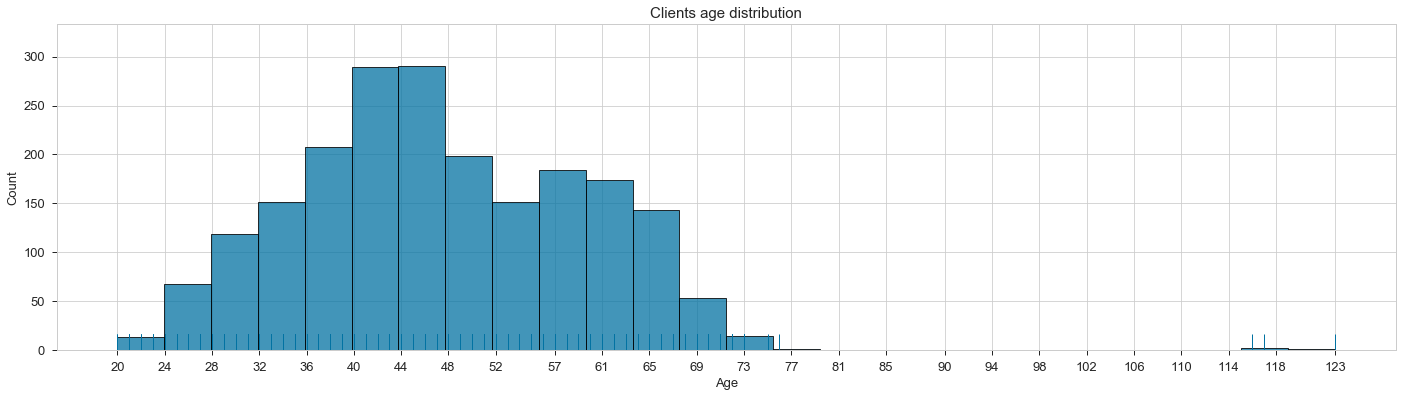

In [13]:
plt.figure(figsize=(24, 6))
plt.title('Clients age distribution')
ax = sns.histplot(data['Age'].sort_values(), bins=26)
sns.rugplot(data=data['Age'], height=.05)
plt.xticks(np.linspace(data['Age'].min(), data['Age'].max(), 26, dtype=int, endpoint = True))
plt.show()

## Outliers

Sono presenti degli esempi poco verosimili, con un'età maggiore di 110 anni.

In [14]:
data.query('Age > 110')

Age  CustomerFor Education Marital_Status   Income  Kidhome  Teenhome  \
ID                                                                             
7829   116         1168  2n Cycle       Divorced  36640.0        1         0   
11004  123          935  2n Cycle         Single  60182.0        0         1   
1150   117         1168       PhD       Together  83532.0        0         0   

       Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
ID                                   ...                        
7829        99        15          6  ...                    1   
11004       23         8          0  ...                    0   
1150        36       755        144  ...                    6   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
ID                                                                        
7829                   2                  5             0             0   
11004                  2                  4             0             0   
1150                   4                  1             0             0   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
ID                                                                   
7829              0             0             0         1         0  
11004             0             0             0         0         0  
1150              1             0             0         0         0  

[3 rows x 26 columns]

### Income

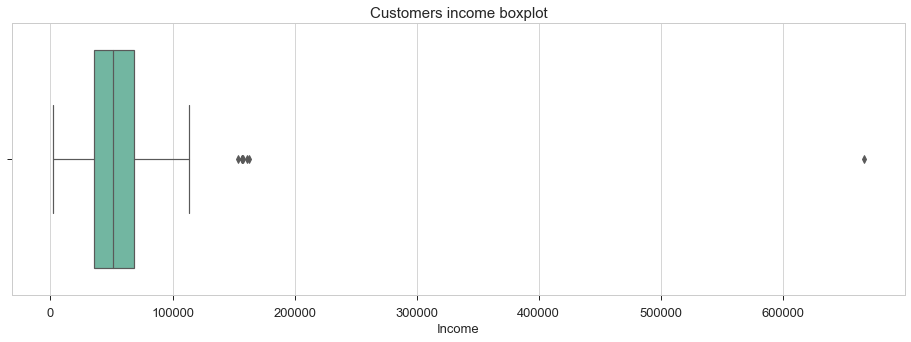

In [15]:
plt.figure(figsize=(16,5))
plt.title(f'Customers income boxplot')
ax = sns.boxplot(data['Income'], palette=PALETTE)
plt.show()

Anche per `Income` sono presenti degli outlier

In [16]:
data.query('Income > 140000')

Age  CustomerFor   Education Marital_Status    Income  Kidhome  \
ID                                                                      
8475    43         1069         PhD        Married  157243.0        0   
1503    40         1372         PhD       Together  162397.0        1   
5555    41          889  Graduation       Divorced  153924.0        0   
1501    34         1704         PhD        Married  160803.0        0   
5336    45         1341      Master       Together  157733.0        1   
4931    39         1318  Graduation       Together  157146.0        0   
11181   67         1196         PhD        Married  156924.0        0   
9432    39         1400  Graduation       Together  666666.0        1   

       Teenhome  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
ID                                             ...                        
8475          1       98        20          2  ...                   22   
1503          1       31        85          1  ...                    0   
5555          0       81         1          1  ...                    0   
1501          0       21        55         16  ...                   28   
5336          0       37        39          1  ...                    0   
4931          0       13         1          0  ...                   28   
11181         0       85         2          1  ...                    0   
9432          0       23         9         14  ...                    1   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
ID                                                                        
8475                   0                  0             0             0   
1503                   1                  1             0             0   
5555                   0                  0             0             0   
1501                   1                  0             0             0   
5336                   1                  1             0             0   
4931                   0                  1             0             0   
11181                  0                  0             0             0   
9432                   3                  6             0             0   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
ID                                                                   
8475              0             0             0         0         0  
1503              0             0             0         0         0  
5555              0             0             0         0         0  
1501              0             0             0         0         0  
5336              0             0             0         0         0  
4931              0             0             0         0         0  
11181             0             0             0         0         0  
9432              0             0             0         0         0  

[8 rows x 26 columns]

Non c'è ragione per considerare questi dati non validi, ma gli outlier possono influenzare negativamente il clustering

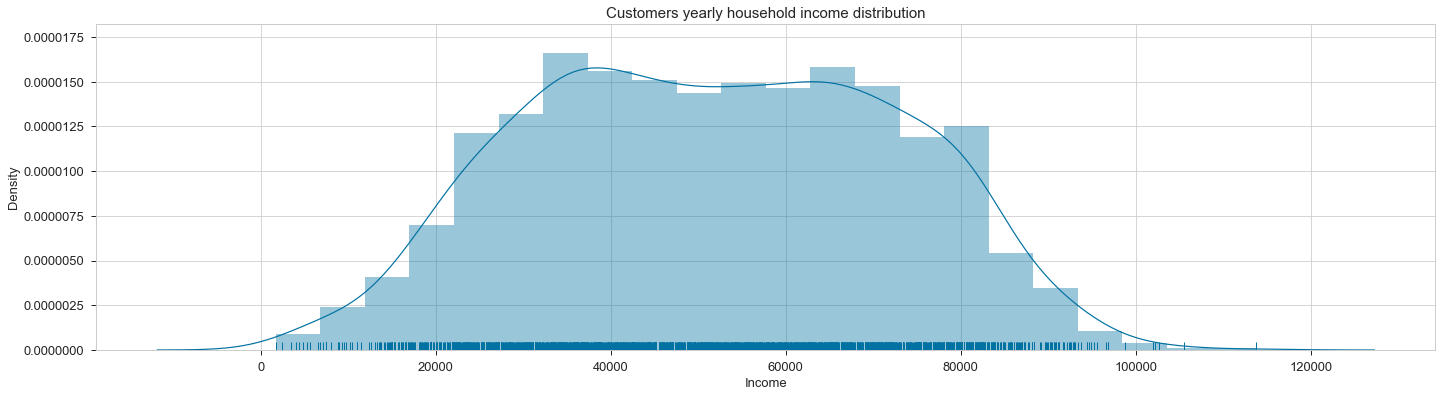

In [17]:
plt.figure(figsize=(24, 6))
plt.title('Customers yearly household income distribution')
ax = sns.distplot(data.query('Income < 150000')['Income'], rug=True)

plt.show()

__Valori null__

In [18]:
print(f'There are {data["Income"].isna().sum()} missing Income values')

There are 24 missing Income values


Sostituiamo i null con la mediana dei valori

In [19]:
data['Income'].fillna(data['Income'].median(), inplace=True)

## Education

In [20]:
data['Education'].value_counts()

Graduation    1030
PhD            450
Master         341
2n Cycle       188
Basic           49
Name: Education, dtype: int64

`Graduation` e `2n Cycle` non sono valori chiari. 

> All countries conveyed their national systems to a two cycle structure consisting of a first (undergraduate) and a second (graduate) cycle. _Source:_ [Wikipedia](https://en.wikipedia.org/wiki/Bologna_Process) 

Assumendo una divisione in 3 cicli dell' Educazione Superiore, `2n Cycle` equivale a `Master`. `Graduation` si riferisce alle persone che hanno terminato il primo ciclo, il cosiddetto `Bachelor`.
Conseguentemente, effettuiamo queste modifiche:
- `2n Cycle` -> `Master`
- `Graduation` -> `Bachelor`

In [21]:
data['Education'].replace(['2n Cycle', 'Graduation'], 
                          ['Master', 'Bachelor'], inplace=True)

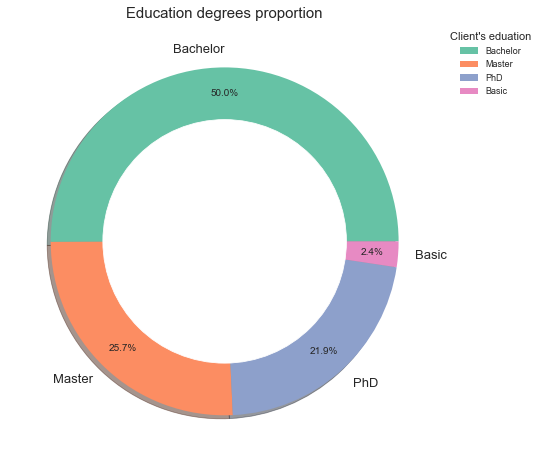

In [22]:
sizes = dict(data['Education'].value_counts())

plt.figure(figsize=(12, 8))
plt.title("Education degrees proportion")
plt.pie(sizes.values(), labels=sizes.keys(), autopct="%.1f%%", pctdistance=0.85, shadow=True, colors=PALETTE)
plt.legend(title="Client's eduation", labels=sizes.keys(), bbox_to_anchor=(1, 1))

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

Come varia `Income` tra i diversi livelli di educazione?

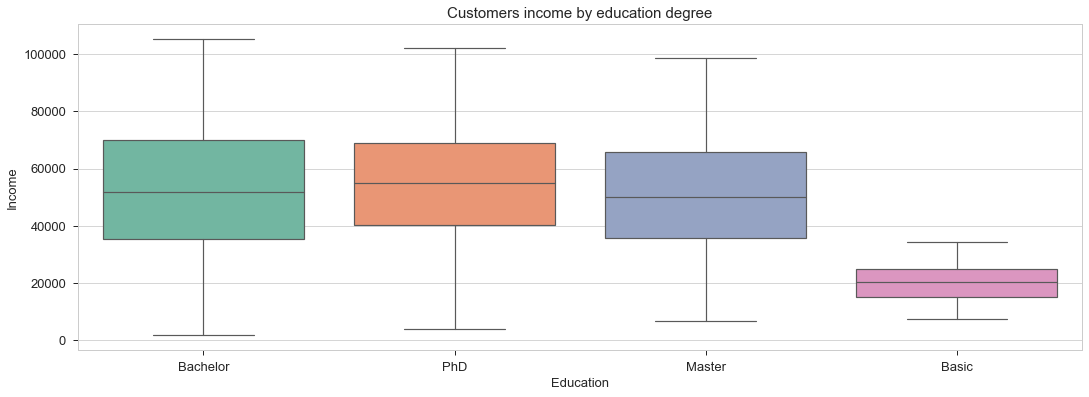

In [23]:
plt.figure(figsize=(18, 6))
sns.boxplot(data=data.query('Income < 500000'), x='Education', y='Income', palette=PALETTE, showfliers=False,)
plt.title('Customers income by education degree')

plt.show()

## Marital status

In [24]:
data['Marital_Status'].value_counts()

Married     795
Together    521
Single      448
Divorced    216
Widow        71
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

Possiamo unire `Alone` e `Single`, ma `YOLO` e `Absurd` non sono chiari.

__YOLO__

> YOLO (You only live once) accords to the lifestyle or trend that many young people have adopted as a way to better enjoy life, and not to think about saving up for the future. 

Assumiamo che la categoria `YOLO` si riferisca comunque a persone che non hanno un partner, quindi la uniremo a  `Single`

__Absurd__

> In philosophy, "the Absurd" refers to the conflict between the human tendency to seek inherent value and meaning in life, and the human inability to find these with any certainty.

Per lo stesso motivo, uniamo `Absurd` e `Single`

In [25]:
data['Marital_Status'].replace(['YOLO', 'Absurd', 'Alone'], 'Single', inplace=True)

Ora osserviamo la proporzione dello stato civile.

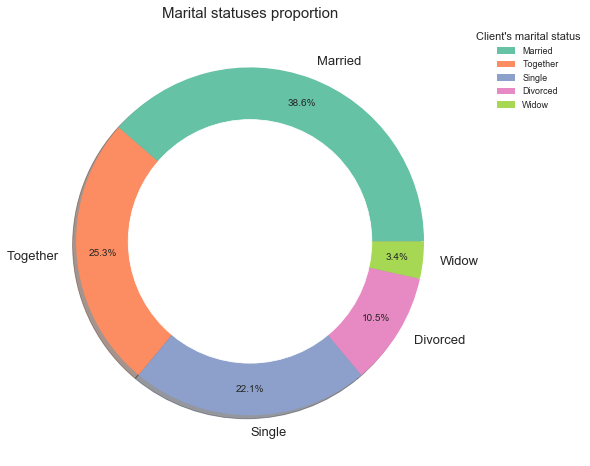

In [26]:
sizes = dict(data['Marital_Status'].value_counts())

plt.figure(figsize=(12, 8))
plt.title("Marital statuses proportion")
plt.pie(sizes.values(), labels=sizes.keys(), autopct="%.1f%%", pctdistance=0.85, shadow=True, colors=PALETTE)
plt.legend(title="Client's marital status", labels=sizes.keys(), bbox_to_anchor=(1, 1))

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

Combiniamo tra loro [`Single`, `Widow`, `Divorced` ] e [`Together`, `Married`], per descrivere la presenza o meno di un partner.

In [27]:
data['HasPartner'] = data["Marital_Status"].replace({'Single': 'No', 
                                                      'Widow': 'No',
                                                      'Divorced': 'No',
                                                      'Together': 'Yes',
                                                      'Married': 'Yes'})

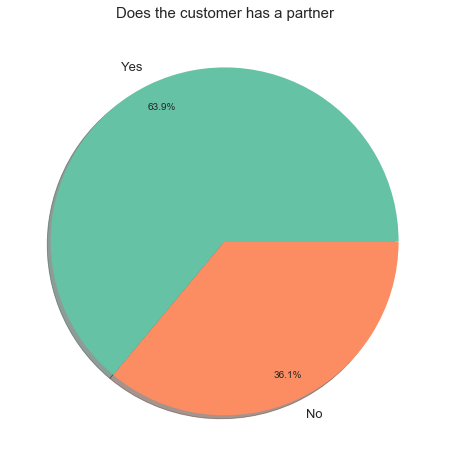

In [28]:
sizes = dict(data['HasPartner'].value_counts())

plt.figure(figsize=(12, 8))
plt.title("Does the customer has a partner")
plt.pie(sizes.values(), labels=sizes.keys(), autopct="%.1f%%", pctdistance=0.85, shadow=True, colors=PALETTE)

plt.show()

Quindi gran parte dei clienti ha un partner.

## Kidhome e Teenhome

In [29]:
data['Kidhome'].value_counts()

0    1184
1     831
2      43
Name: Kidhome, dtype: int64

In [30]:
data['Teenhome'].value_counts()

0    1060
1     948
2      50
Name: Teenhome, dtype: int64

Consideriamo tutti i bambini per cliente utilizzando una nuova feature, `NumChildren`.

Introduciamo anche `HasChildren` uguale a 1, se il cliente ha 1 o più figli, 0 altrimenti.

In [31]:
data['NumChildren'] = data['Kidhome'] + data['Teenhome']
data['HasChildren'] = (data['NumChildren'] >= 1).astype('int64')

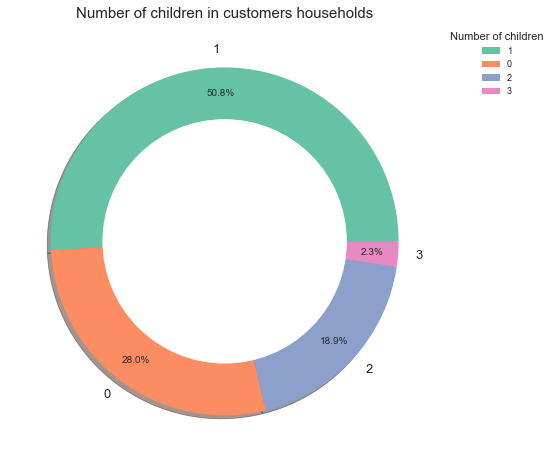

In [32]:
sizes = dict(data['NumChildren'].value_counts())

plt.figure(figsize=(12, 8))
plt.title("Number of children in customers households")
plt.pie(sizes.values(), labels=sizes.keys(), autopct="%.1f%%", pctdistance=0.85, shadow=True, colors=PALETTE)
plt.legend(title="Number of children", labels=sizes.keys(), bbox_to_anchor=(1, 1))

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

Come sono correlate `Income` e `HasChildren`?

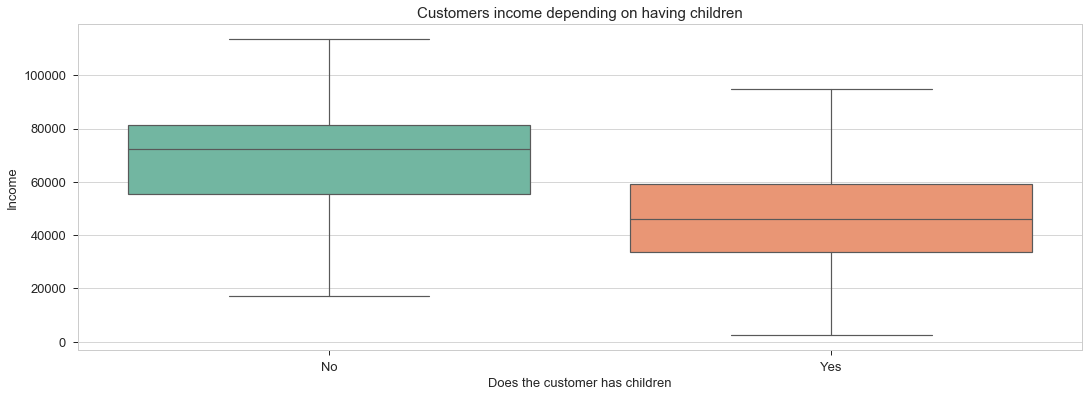

In [33]:
plt.figure(figsize=(18, 6))
ax = sns.boxplot(data=data.query('Income < 500000'), x='HasChildren', y='Income', palette=PALETTE, showfliers=False)
plt.title('Customers income depending on having children')
ax.set_xticklabels(['No', 'Yes'])
ax.set_xlabel('Does the customer has children')

plt.show()

Come sono correlate `Income` e `HasPartner`?

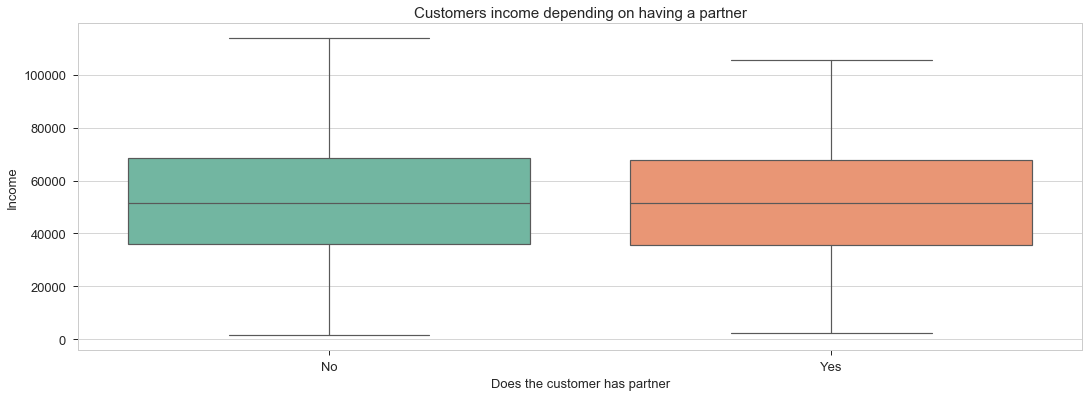

In [34]:
plt.figure(figsize=(18, 6))
ax = sns.boxplot(data=data.query('Income < 500000'), x='HasPartner', y='Income', palette=PALETTE, showfliers=False)
plt.title('Customers income depending on having a partner')
ax.set_xticklabels(['No', 'Yes'])
ax.set_xlabel('Does the customer has partner')

plt.show()

## Denaro speso

In [35]:
mnt = data.filter(like='Mnt').apply(lambda x: sum(x), axis=0)

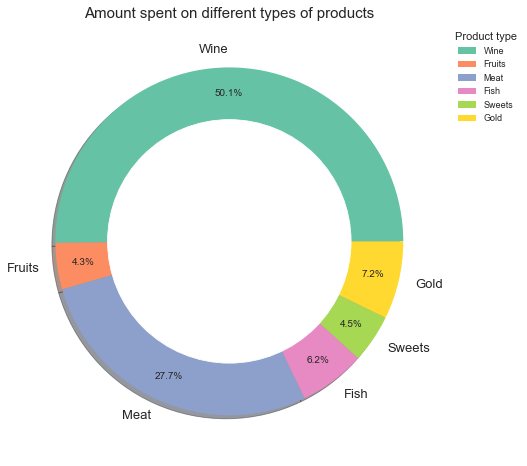

In [36]:
sizes = dict(mnt)

plt.figure(figsize=(12, 8))
plt.title("Amount spent on different types of products")
plt.pie(sizes.values(), labels=['Wine', 'Fruits', 'Meat',
                                'Fish', 'Sweets', 'Gold'], autopct="%.1f%%", pctdistance=0.85, shadow=True, colors=PALETTE)
plt.legend(title="Product type", labels=['Wine', 'Fruits', 'Meat',
                                         'Fish', 'Sweets', 'Gold'], bbox_to_anchor=(1, 1))

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

`Wines` e `Meat` sono i prodotti per cui si è speso di più

Introduciamo la feature `MntTotal`, che è l'importo totale speso dal cliente negli ultimi 2 anni

In [37]:
data['MntTotal'] = data.filter(like='Mnt').sum(axis=1)

E calcoleremo la percentuale dell'importo speso per ciascun tipo di prodotto dall'importo totale speso per ciascun cliente

In [38]:
data = data.assign(
        percentWines=lambda x: x['MntWines'] / x['MntTotal'] * 100,
        percentMeat=lambda x: x['MntMeatProducts'] / x['MntTotal'] * 100,
        percentFruits=lambda x: x['MntFruits'] / x['MntTotal'] * 100,
        percentFish=lambda x: x['MntFishProducts'] / x['MntTotal'] * 100,
        percentSweets=lambda x: x['MntSweetProducts'] / x['MntTotal'] * 100,
        percentGold=lambda x: x['MntGoldProds'] / x['MntTotal'] * 100,
)

Analizziamo queste feature in termini di istruzione

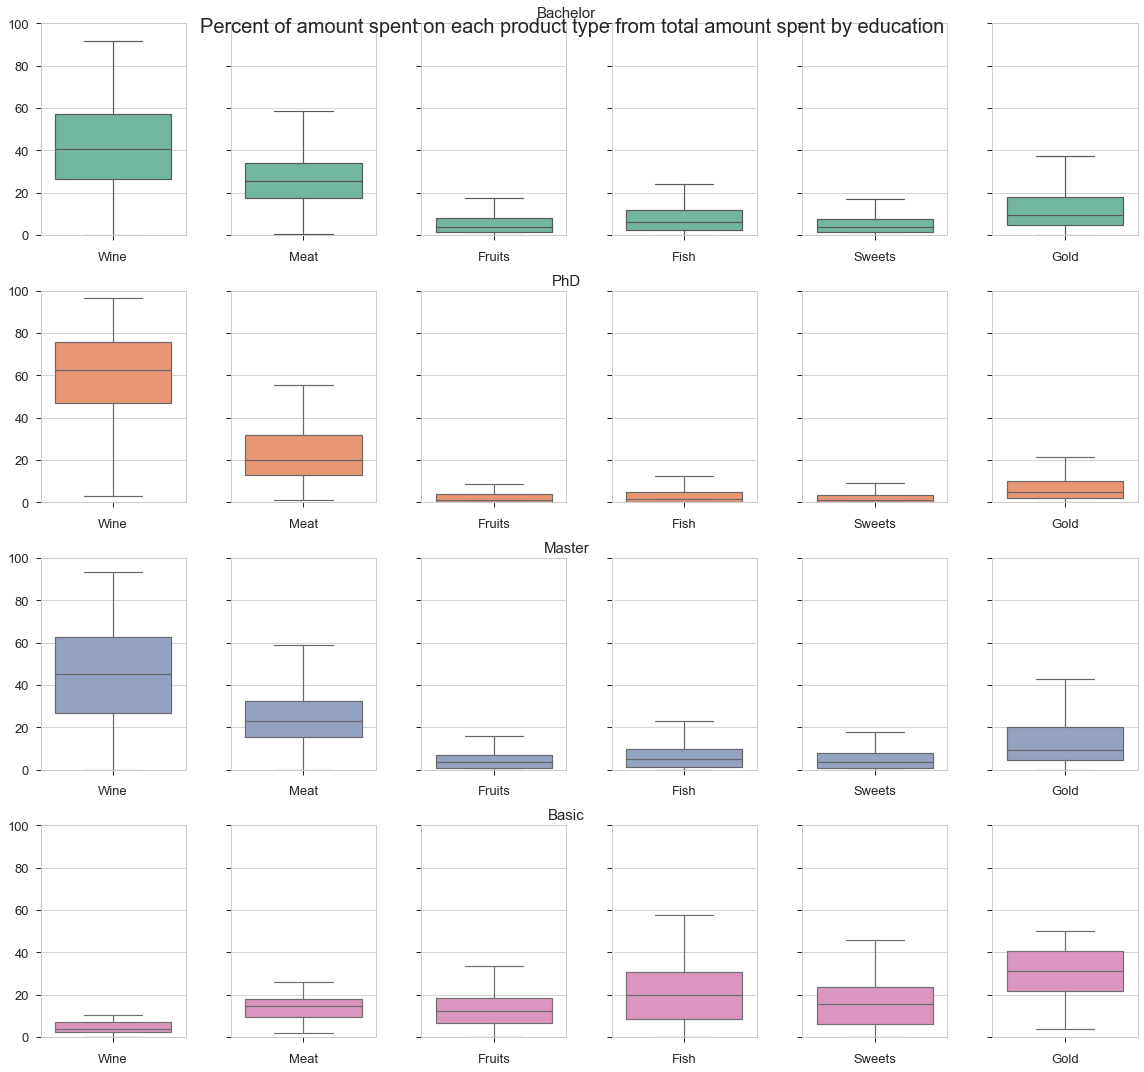

In [39]:
fig, axes = plt.subplots(4, 6, figsize=(16, 15), sharey=True)
fig.suptitle('Percent of amount spent on each product type from total amount spent by education', fontsize=20)

for i, value in enumerate(data['Education'].unique()):
    sns.boxplot(data=data.query(f'Education == "{value}"'), y='percentWines', showfliers=False, color=PALETTE[i], ax=axes[i, 0])
    axes[i, 0].set_ylim(0, 100)
    axes[i, 0].set_xlabel('Wine')
    axes[i, 0].set_ylabel('')
    
    sns.boxplot(data=data.query(f'Education == "{value}"'), y='percentMeat', showfliers=False, color=PALETTE[i], ax=axes[i, 1])
    axes[i, 1].set_xlabel('Meat')
    axes[i, 1].set_ylabel('')
    
    sns.boxplot(data=data.query(f'Education == "{value}"'), y='percentFruits', showfliers=False, color=PALETTE[i], ax=axes[i, 2])
    axes[i, 2].set_xlabel('Fruits')
    axes[i, 2].set_ylabel('')
    axes[i, 2].set_title(f'{value}', x=1)
    
    sns.boxplot(data=data.query(f'Education == "{value}"'), y='percentFish', showfliers=False, color=PALETTE[i], ax=axes[i, 3])
    axes[i, 3].set_xlabel('Fish')
    axes[i, 3].set_ylabel('')
    
    sns.boxplot(data=data.query(f'Education == "{value}"'), y='percentSweets', showfliers=False, color=PALETTE[i], ax=axes[i, 4])
    axes[i, 4].set_xlabel('Sweets')
    axes[i, 4].set_ylabel('')
    
    sns.boxplot(data=data.query(f'Education == "{value}"'), y='percentGold', showfliers=False, color=PALETTE[i], ax=axes[i, 5])
    axes[i, 5].set_xlabel('Gold')
    axes[i, 5].set_ylabel('')
    
plt.tight_layout()

I clienti con dottorato di ricerca, laurea triennale e magistrale spendono prevalentemente in prodotti di vino e carne. Bisogna anche notare che più della metà delle spese dei dottorandi sono prodotti di vino

E i clienti senza titolo spendono di più in oro, pesce, dolci

Ora controlliamo l'importo totale speso in base ai titoli di studio e al numero di bambini

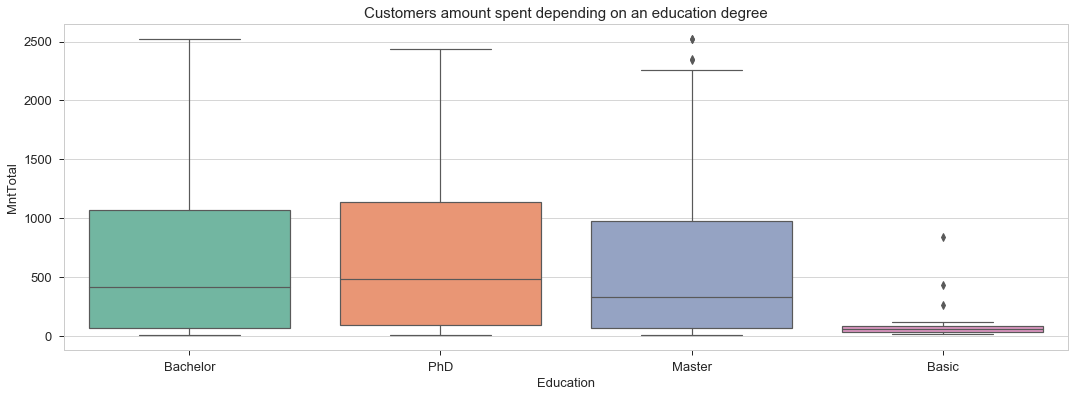

In [40]:
plt.figure(figsize=(18, 6))
ax = sns.boxplot(data=data, x='Education', y='MntTotal', palette=PALETTE)
plt.title('Customers amount spent depending on an education degree')

plt.show()

I clienti con laurea triennale hanno speso l'importo maggiore negli ultimi 2 anni, mentre quelli senza titolo il minimo. Ciò corrisponde alla distribuzione 'Income'

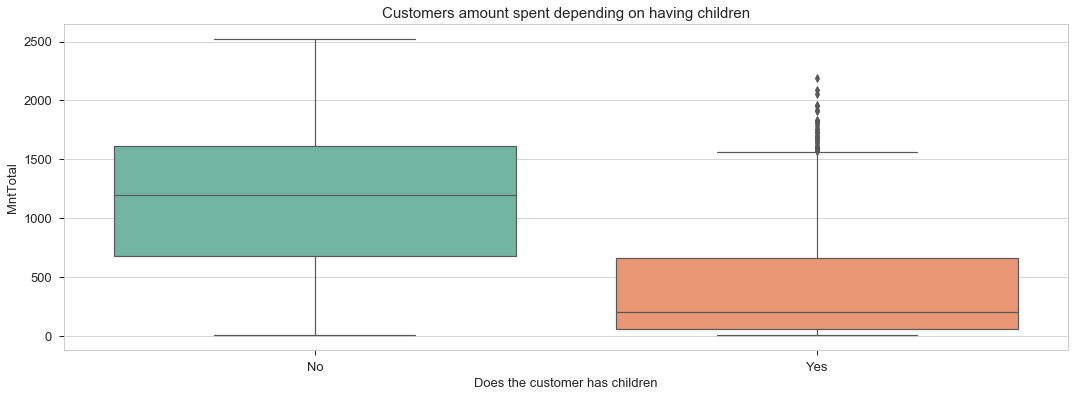

In [41]:
plt.figure(figsize=(18, 6))
ax = sns.boxplot(data=data, x='HasChildren', y='MntTotal', palette=PALETTE)
plt.title('Customers amount spent depending on having children')
ax.set_xticklabels(['No', 'Yes'])
ax.set_xlabel('Does the customer has children')

plt.show()

L'importo speso da genitori e non genitori è molto diverso

## Numero di acquisti

In [42]:
num = data.filter(regex='Num[^Deals].+Purchases').sum(axis=0)

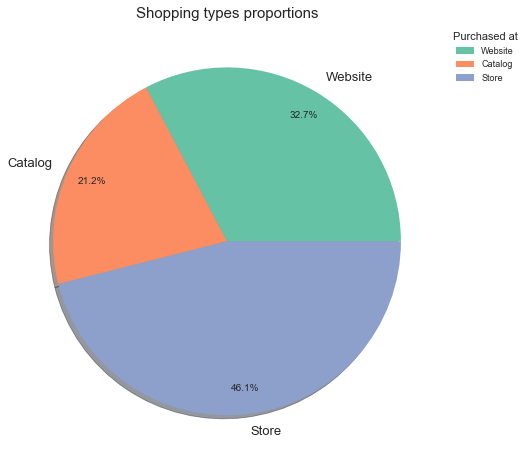

In [43]:
sizes = dict(num)

plt.figure(figsize=(12, 8))
plt.title("Shopping types proportions")
plt.pie(sizes.values(), labels=['Website', 'Catalog', 'Store'], autopct="%.1f%%", pctdistance=0.85, shadow=True, colors=PALETTE)
plt.legend(title="Purchased at", labels=['Website', 'Catalog', 'Store'], bbox_to_anchor=(1, 1))

plt.show()

Gran parte degli acquisti provengono dagli store

Emerge un dato interessante secondo cui i clienti senza titolo visitano di più i siti web ogni mese rispetto agli altri 

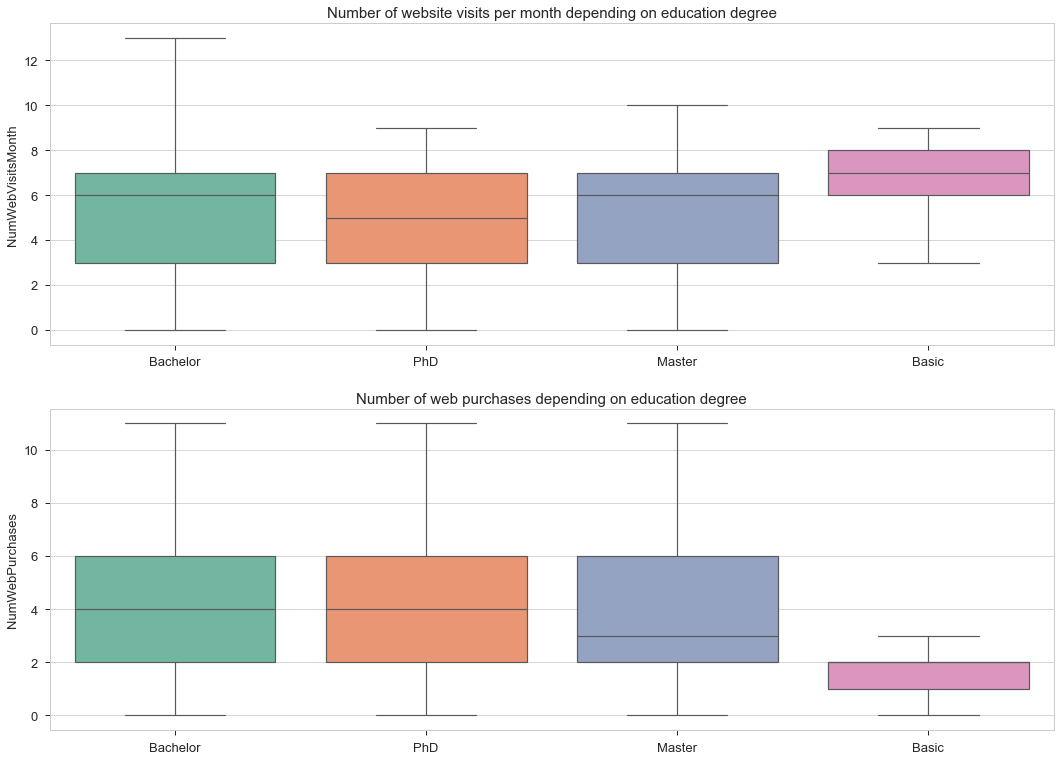

In [44]:
fig, axes= plt.subplots(2, 1, figsize=(18, 13))

sns.boxplot(data=data, x='Education', y='NumWebVisitsMonth', palette=PALETTE, showfliers=False, ax=axes[0])
axes[0].set_title('Number of website visits per month depending on education degree')
axes[0].set_xlabel('')

sns.boxplot(data=data, x='Education', y='NumWebPurchases', palette=PALETTE, showfliers=False, ax=axes[1])
axes[1].set_title('Number of web purchases depending on education degree')
axes[1].set_xlabel('')

plt.show()

Nonostante ciò non comprano molto da siti web ma si limitano a controllare le offerte. Di conseguenza il negozio potrebbe promuovere più offerte sul sito per indurli a fare acquisti

Stessa cosa per i clienti che hanno figli:

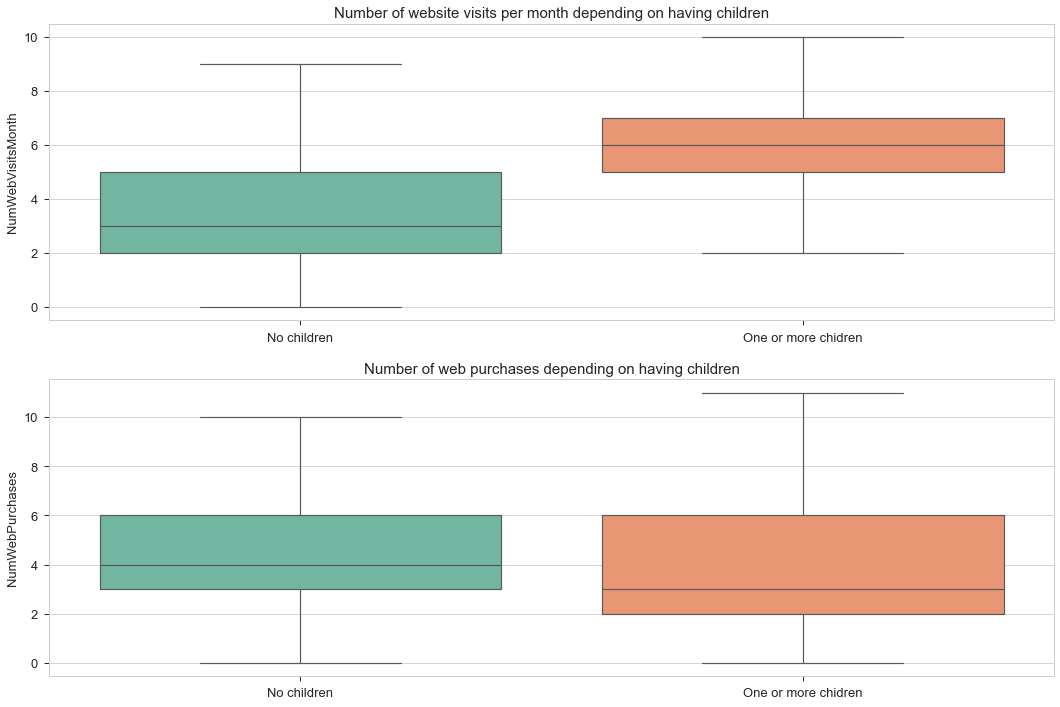

In [45]:
fig, axes= plt.subplots(2, 1, figsize=(18, 12))

sns.boxplot(data=data, x='HasChildren', y='NumWebVisitsMonth', palette=PALETTE, showfliers=False, ax=axes[0])
axes[0].set_title('Number of website visits per month depending on having children')
axes[0].set_xlabel('')
axes[0].set_xticklabels(['No children', 'One or more chidren'])

sns.boxplot(data=data, x='HasChildren', y='NumWebPurchases', palette=PALETTE, showfliers=False, ax=axes[1])
axes[1].set_title('Number of web purchases depending on having children')
axes[1].set_xlabel('')
axes[1].set_xticklabels(['No children', 'One or more chidren'])

plt.show()

In [46]:
data['NumTotalPurchases'] = data.filter(regex='Num[^Deals].+Purchases').sum(axis=1)

La feature `NumTotalPurchases` indica il totale di tutti gli acquisti fatti dai clienti

In [47]:
data.loc[(data['NumTotalPurchases'] == 0) & (data['MntTotal'] != 0)]

Age  CustomerFor Education Marital_Status    Income  Kidhome  Teenhome  \
ID                                                                              
5555    41          889  Bachelor       Divorced  153924.0        0         0   
3955    51          899  Bachelor       Divorced    4861.0        0         0   
6862    45          934  Bachelor       Divorced    1730.0        0         0   
11110   43         1334  Bachelor         Single    3502.0        1         0   
9931    53          898       PhD        Married    4023.0        1         1   
11181   67         1196       PhD        Married  156924.0        0         0   

       Recency  MntWines  MntFruits  ...  NumChildren  HasChildren  MntTotal  \
ID                                   ...                                       
5555        81         1          1  ...            0            0         6   
3955        20         2          1  ...            0            0         6   
6862        65         1          1  ...            0            0         8   
11110       56         2          1  ...            1            1         5   
9931        29         5          0  ...            2            1         9   
11181       85         2          1  ...            0            0         8   

       percentWines  percentMeat  percentFruits  percentFish  percentSweets  \
ID                                                                            
5555      16.666667    16.666667      16.666667    16.666667      16.666667   
3955      33.333333    16.666667      16.666667    16.666667       0.000000   
6862      12.500000    37.500000      12.500000    12.500000      12.500000   
11110     40.000000    20.000000      20.000000     0.000000       0.000000   
9931      55.555556    11.111111       0.000000    11.111111      11.111111   
11181     25.000000    25.000000      12.500000    12.500000      12.500000   

       percentGold  NumTotalPurchases  
ID                                     
5555     16.666667                  0  
3955     16.666667                  0  
6862     12.500000                  0  
11110    20.000000                  0  
9931     11.111111                  0  
11181    12.500000                  0  

[6 rows x 37 columns]

Ci sono 6 clienti con 0 acquisti, ma l'importo totale speso non è 0. Eliminiamo questi esempi perchè non sono validi.

In [48]:
data.drop(data.loc[(data['NumTotalPurchases'] == 0) & (data['MntTotal'] != 0)].index, inplace=True)

Vediamo la correlazione tra `CustomerFor` e `NumTotalPurchases`

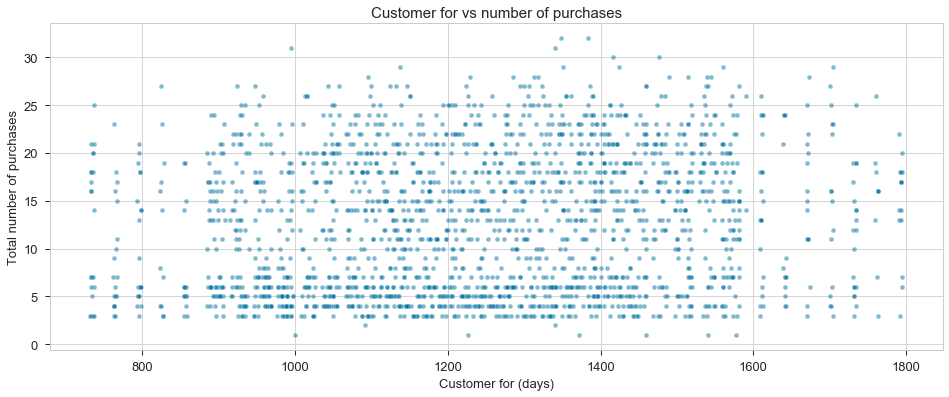

In [49]:
plt.figure(figsize=(16, 6))
plt.title('Customer for vs number of purchases')
sns.scatterplot(data=data, x='CustomerFor', y='NumTotalPurchases', alpha=0.5)
plt.xlabel('Customer for (days)')
plt.ylabel('Total number of purchases')
plt.show()

Sembra non ci sia correlazione tra `CustomerFor` e `NumTotalPurchases`. Quindi si presume che le informazioni sul numero di acquisti siano state raccolte anche negli ultimi 2 anni e che possiamo valutare l'attività del cliente con `NumTotalPurchases`

`AvgCheck` è il valore medio speso dai clienti per i loro acquisti

In [50]:
data['AvgCheck'] = data['MntTotal'] / data['NumTotalPurchases']

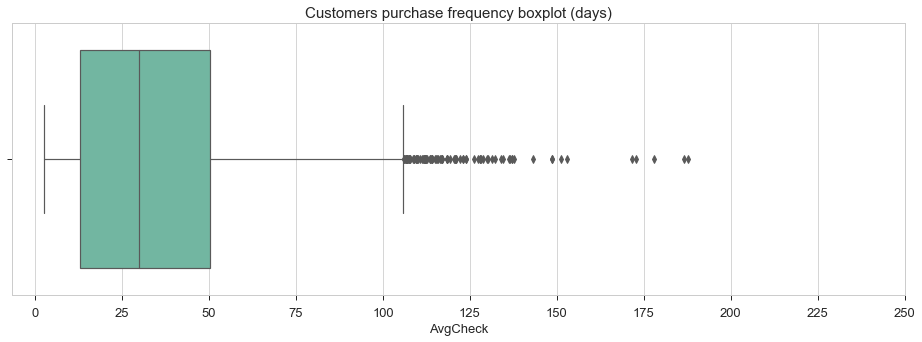

In [51]:
plt.figure(figsize=(16,5))
plt.title(f'Customers purchase frequency boxplot (days)')
ax = sns.boxplot(data.query('AvgCheck < 1600')['AvgCheck'], palette=PALETTE)
plt.xticks(np.linspace(0, 250, 11, dtype=int))
plt.show()

E' presente anche un valore anomalo, 1679 di media

In [52]:
data.query('AvgCheck > 1500')

Age  CustomerFor Education Marital_Status   Income  Kidhome  Teenhome  \
ID                                                                            
8720   38         1460    Master       Together  51533.0        0         0   

      Recency  MntWines  MntFruits  ...  HasChildren  MntTotal  percentWines  \
ID                                  ...                                        
8720       53        32          2  ...            0      1679      1.905896   

      percentMeat  percentFruits  percentFish  percentSweets  percentGold  \
ID                                                                          
8720    95.711733       0.119119     0.714711       0.238237     1.310304   

      NumTotalPurchases  AvgCheck  
ID                                 
8720                  1    1679.0  

[1 rows x 38 columns]

## Campagne accettate

Aggiungiamo la feature `AcceptedTotal`, ovvero il numero totale di campagne accettate dal cliente

In [53]:
data['AcceptedTotal'] = data.filter(regex='Accepted|Response').sum(axis=1)

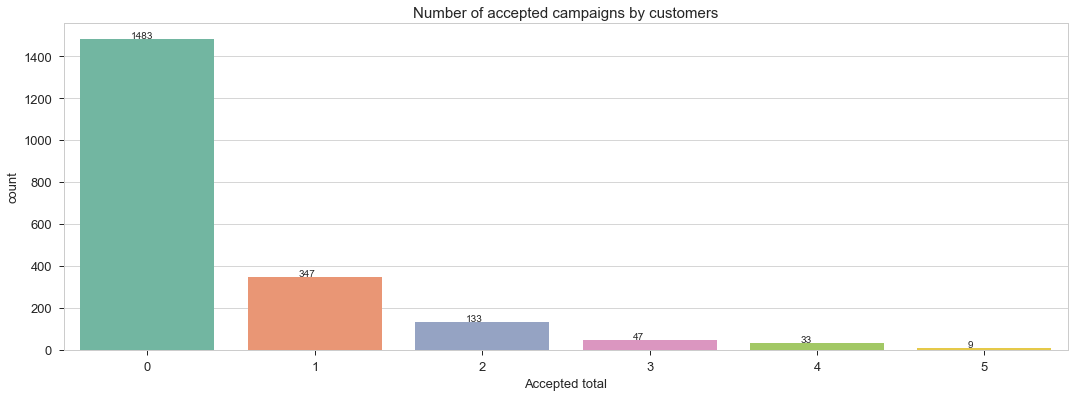

In [54]:
plt.figure(figsize=(18, 6))

ax = sns.countplot(data['AcceptedTotal'], palette=PALETTE)

plt.title('Number of accepted campaigns by customers')
plt.xlabel('Accepted total')

# annotating the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+0.30, p.get_height()+3))

La maggior parte dei clienti non ha accettato nessuna campagna

In [55]:
total = data.groupby('AcceptedTotal').sum().reset_index()

In [56]:
total

AcceptedTotal    Age  CustomerFor      Income  Kidhome  Teenhome  Recency  \
0              0  69754      1829783  72417505.0      750       820    75330   
1              1  16893       439732  19584933.0      122       164    15791   
2              2   6278       170055   8255826.0       38        45     5328   
3              3   2069        61138   3673928.0        3        13     2047   
4              4   1446        40620   2698811.0        2         4     1526   
5              5    424        10957    776573.0        0         1      385   

   MntWines  MntFruits  MntMeatProducts  ...  HasChildren  MntTotal  \
0    321642      33514           188040  ...         1174    681390   
1    148182      10814            80399  ...          220    285270   
2     80421       4840            39290  ...           66    143835   
3     37472       2558            18206  ...           13     69530   
4     29765       1898            15857  ...            5     54393   
5      7976        362             3335  ...            1     13183   

   percentWines   percentMeat  percentFruits   percentFish  percentSweets  \
0  65219.039141  37163.249189    7947.485706  11519.884753    8103.157796   
1  17288.823648   8563.345590    1312.328686   1907.139665    1501.385281   
2   6923.459559   3232.643823     529.176335    612.829615     471.188162   
3   2588.213200   1174.937038     164.250368    275.622428     171.170592   
4   1789.893794    966.999260     109.180101    116.017155     136.356585   
5    500.089620    238.869836      29.314826     38.708212      43.445296   

    percentGold  NumTotalPurchases      AvgCheck  
0  18347.183415              16824  45092.127532  
1   4126.977131               5089  18285.824019  
2   1530.702506               2102   8152.279449  
3    325.806374                906   3838.849095  
4    181.553106                682   2720.071416  
5     49.572211                184    691.765987  

[6 rows x 36 columns]

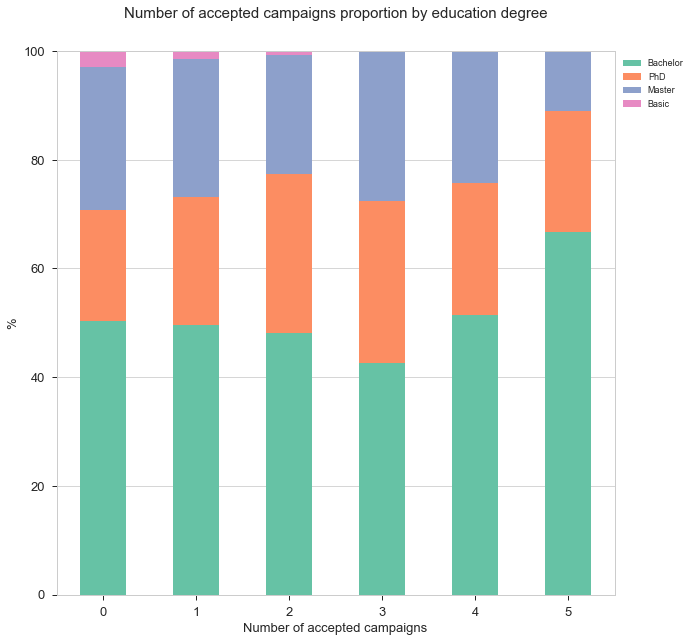

In [57]:
plt.figure(figsize=(10, 10))

accepted_data = pd.Series({i: 0 for i in range(6)})
tmp_data = accepted_data
for i, value in enumerate(data['Education'].unique()):
    tmp_data += accepted_data
    accepted_data = (data.query(f'Education == "{value}"')['AcceptedTotal'].value_counts()
                                                                           .divide(data['AcceptedTotal'].value_counts())
                                                                           .multiply(100))
    ax = accepted_data.plot(kind='bar', bottom=tmp_data, color=PALETTE[i], label=f'{value}')

del tmp_data

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.title('Number of accepted campaigns proportion by education degree', y=1.05)
plt.xlabel('Number of accepted campaigns')
plt.ylabel('%')
plt.legend(bbox_to_anchor=(1,1))

plt.show()

Non compare nessun cliente senza titolo che ha accettato più di 2 campagne

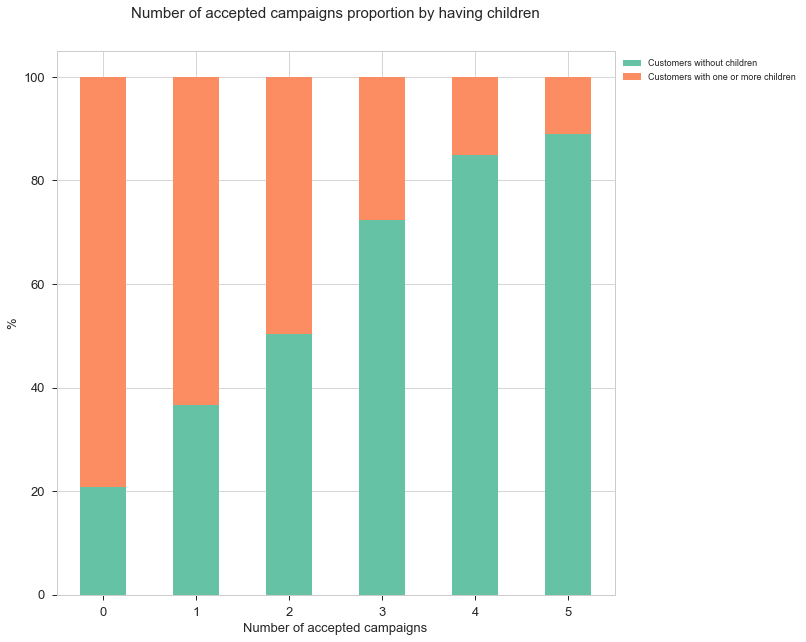

In [58]:
plt.figure(figsize=(10, 10))

accepted_data = pd.Series({i: 0 for i in range(6)})
tmp_data = accepted_data
for i, value in enumerate(data['HasChildren'].unique()):
    tmp_data += accepted_data
    accepted_data = (data.query(f'HasChildren == {value}')['AcceptedTotal'].value_counts()
                                                                           .divide(data['AcceptedTotal'].value_counts())
                                                                           .multiply(100))
    ax = accepted_data.plot(kind='bar', bottom=tmp_data, color=PALETTE[i], label=f'{value}')

del tmp_data

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.title('Number of accepted campaigns proportion by having children', y=1.05)
plt.xlabel('Number of accepted campaigns')
plt.ylabel('%')
plt.legend(['Customers without children', 'Customers with one or more children'], bbox_to_anchor=(1,1))

plt.show()

Questo grafico ci mostra che più campagne sono state accettate dai clienti, più è probabile che siano clienti senza figli

## Data Cleaning

In [59]:
data_cleaned = data.drop(data[(data['Income'] > 140000) |
                              (data['Age'] > 100) |
                              (data['AvgCheck'] > 150)].index)

In [60]:
data_cleaned

Age  CustomerFor Education Marital_Status   Income  Kidhome  Teenhome  \
ID                                                                             
5524    59         1703  Bachelor         Single  58138.0        0         0   
2174    62          857  Bachelor         Single  46344.0        1         1   
4141    51         1204  Bachelor       Together  71613.0        0         0   
6182    32          797  Bachelor       Together  26646.0        1         0   
5324    35         1053       PhD        Married  58293.0        1         0   
...    ...          ...       ...            ...      ...      ...       ...   
8080    30         1573  Bachelor         Single  26816.0        0         0   
10870   49         1273  Bachelor        Married  61223.0        0         1   
7270    35         1047  Bachelor       Divorced  56981.0        0         0   
8235    60         1048    Master       Together  69245.0        0         1   
9405    62         1514       PhD        Married  52869.0        1         1   

       Recency  MntWines  MntFruits  ...  MntTotal  percentWines  percentMeat  \
ID                                   ...                                        
5524        58       635         88  ...      1617     39.270254    33.766234   
2174        38        11          1  ...        27     40.740741    22.222222   
4141        26       426         49  ...       776     54.896907    16.365979   
6182        26        11          4  ...        53     20.754717    37.735849   
5324        94       173         43  ...       422     40.995261    27.962085   
...        ...       ...        ...  ...       ...           ...          ...   
8080        50         5          1  ...        22     22.727273    27.272727   
10870       46       709         43  ...      1341     52.870992    13.571961   
7270        91       908         48  ...      1241     73.166801    17.485898   
8235         8       428         30  ...       843     50.771056    25.385528   
9405        40        84          3  ...       172     48.837209    35.465116   

       percentFruits  percentFish  percentSweets  percentGold  \
ID                                                              
5524        5.442177    10.636982       5.442177     5.442177   
2174        3.703704     7.407407       3.703704    22.222222   
4141        6.314433    14.304124       2.706186     5.412371   
6182        7.547170    18.867925       5.660377     9.433962   
5324       10.189573    10.900474       6.398104     3.554502   
...              ...          ...            ...          ...   
8080        4.545455    13.636364      18.181818    13.636364   
10870       3.206562     3.131991       8.799403    18.419090   
7270        3.867849     2.578566       0.966962     1.933924   
8235        3.558719     9.489917       3.558719     7.236062   
9405        1.744186     1.162791       0.581395    12.209302   

       NumTotalPurchases   AvgCheck  AcceptedTotal  
ID                                                  
5524                  22  73.500000              1  
2174                   4   6.750000              0  
4141                  20  38.800000              0  
6182                   6   8.833333              0  
5324                  14  30.142857              0  
...                  ...        ...            ...  
8080                   3   7.333333              0  
10870                 16  83.812500              0  
7270                  18  68.944444              1  
8235                  21  40.142857              0  
9405                   8  21.500000              1  

[2035 rows x 39 columns]

## Analisi multivariata

In [61]:
NUMERICAL_FEATURES = ['Age', 'Income', 'NumChildren', 'CustomerFor', 
                      'Recency', 'MntWines', 'MntTotal', 
                      'NumTotalPurchases', 'AcceptedTotal', 'AvgCheck']

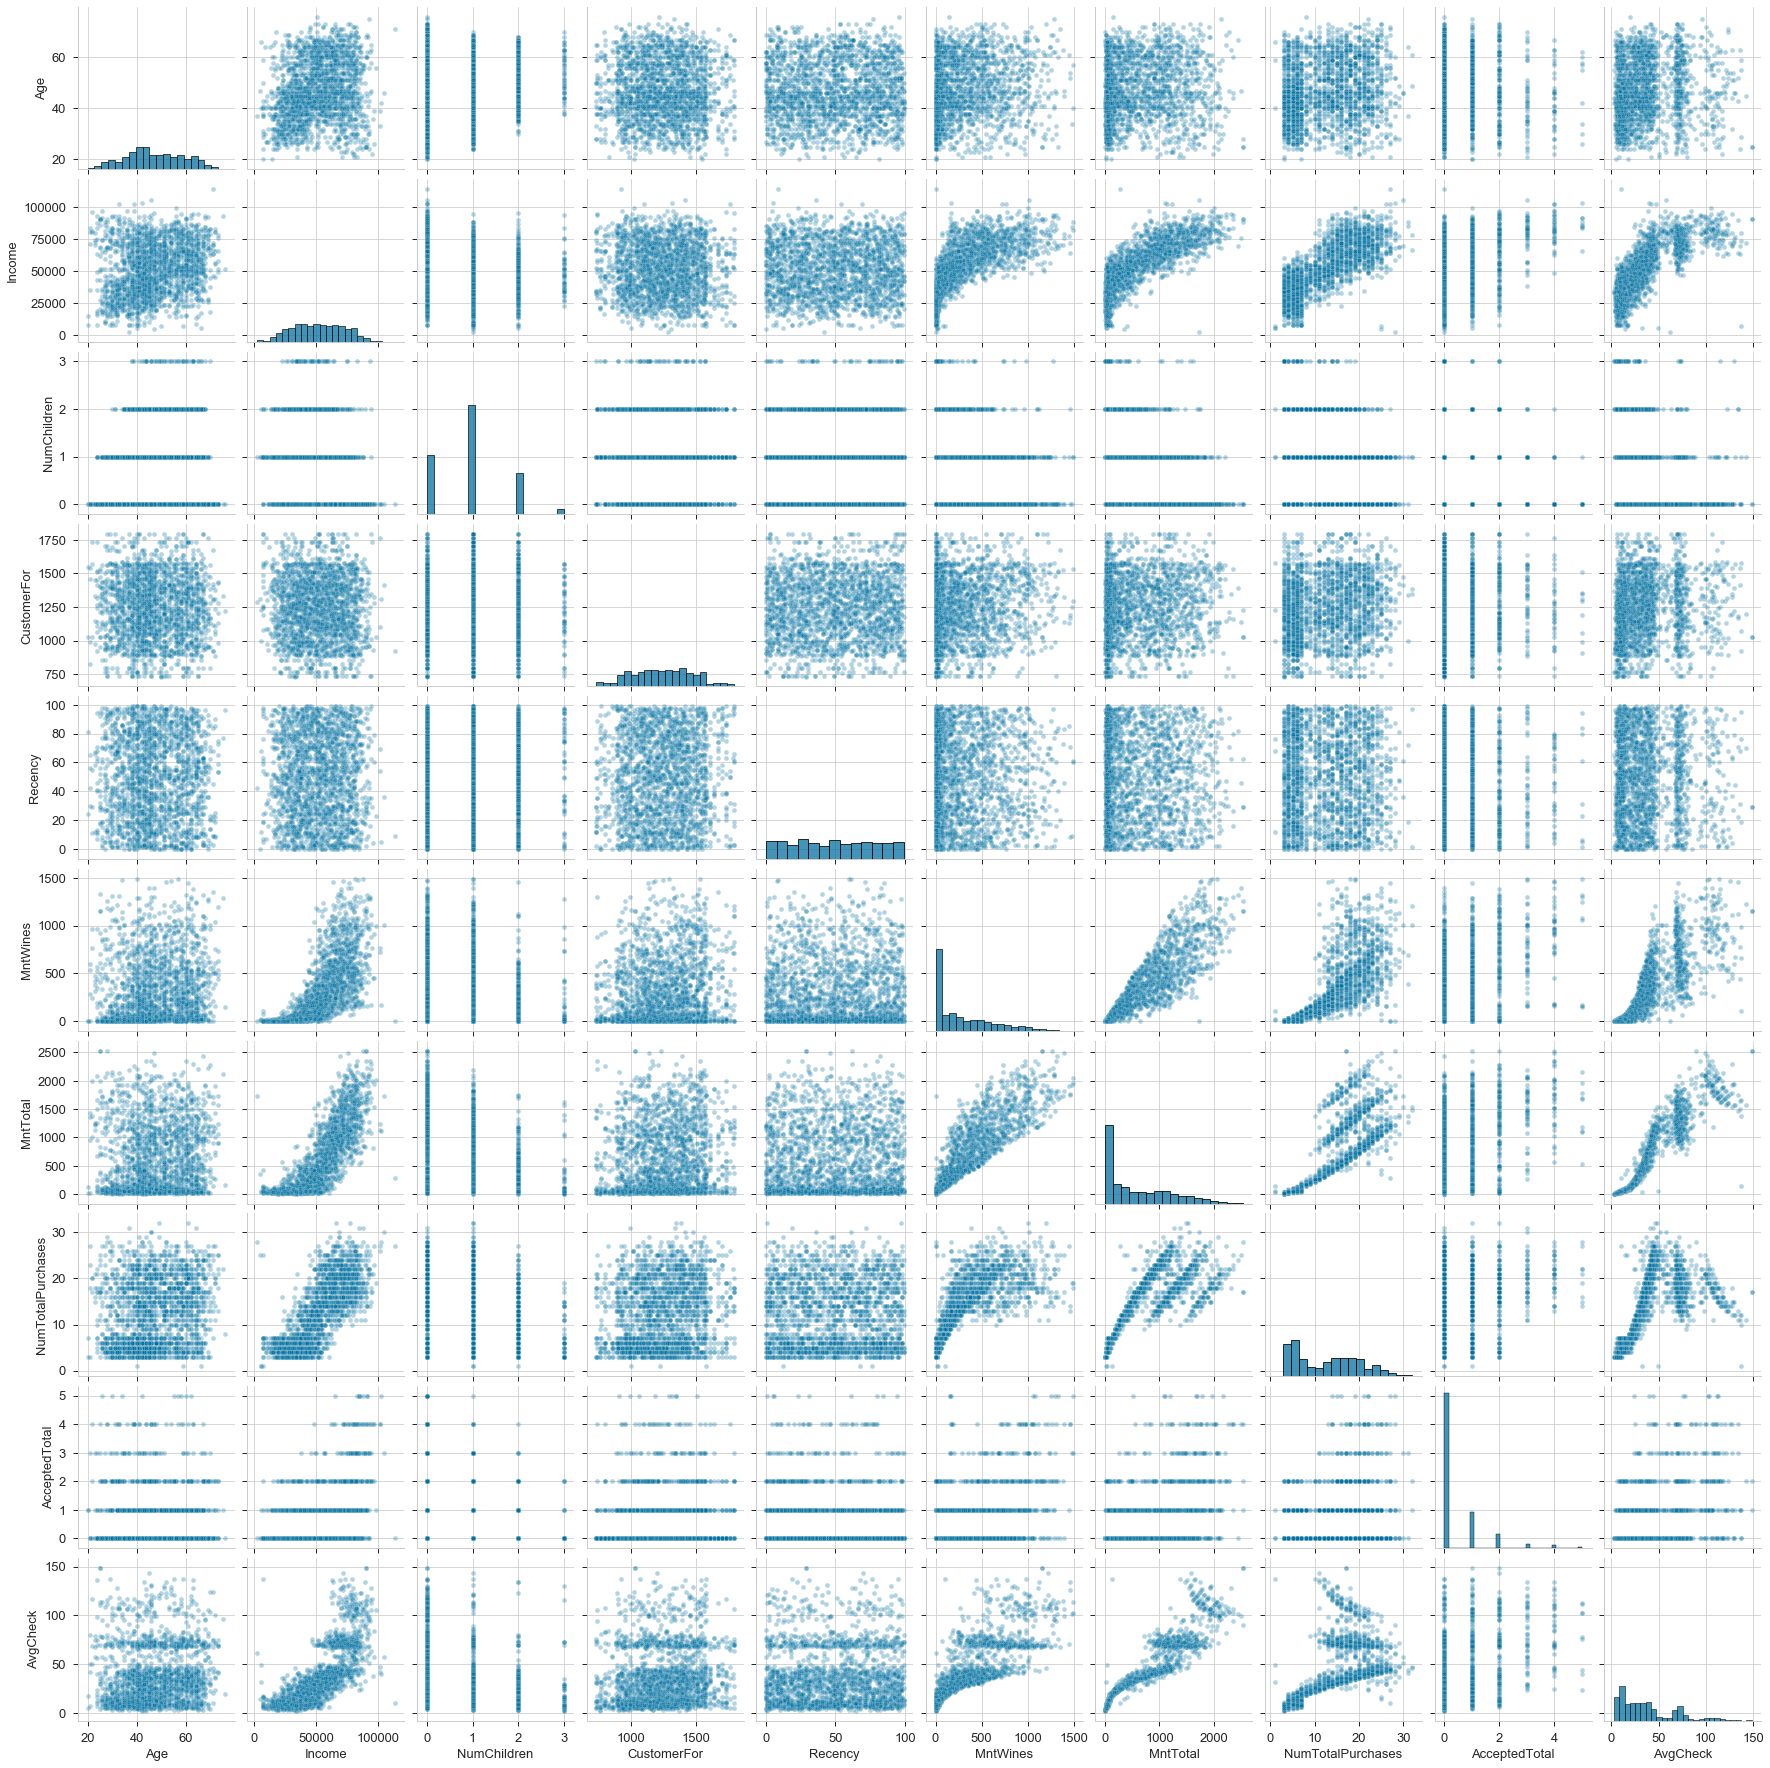

In [62]:
sns.pairplot(data=data_cleaned[NUMERICAL_FEATURES], 
             kind='scatter', plot_kws={'alpha':0.3})
plt.show()

Possiamo notare aree differenti di oggetti su alcuni grafici a dispersione. `MntTotal` e `NumTotalPurchases`, per istanza, o `AvgCheck` e `Age`

Ciò accade perché `NumTotalPurchases` ha una distribuzione multimodale. E `AvgCheck` calcola in base a `NumTotalPurchases` 

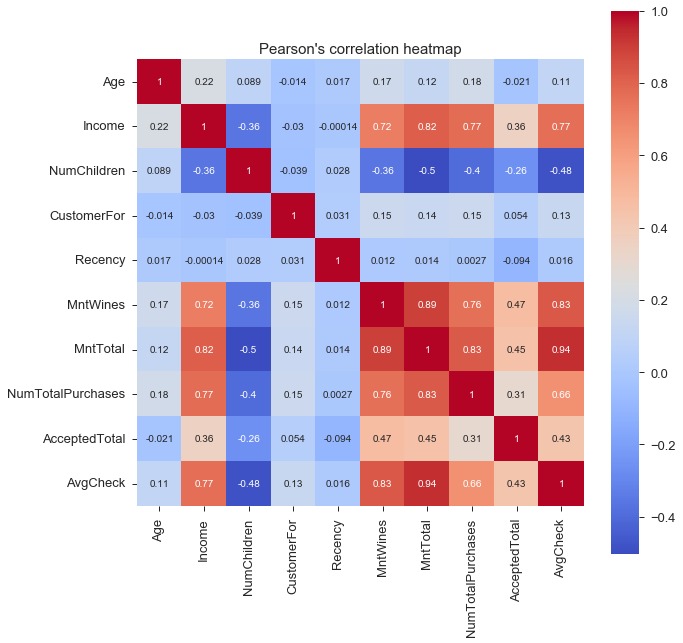

In [63]:
corr_matr = data_cleaned[NUMERICAL_FEATURES].corr(method='pearson')
plt.figure(figsize=(10,10))
sns.heatmap(corr_matr, annot=True, cmap='coolwarm', square=True)
plt.title("Pearson's correlation heatmap")
plt.show()

Tutte le correlazioni sono chiare

# Data preprocessing

## Feature scaling

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2052 entries, 5524 to 9405
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2052 non-null   int64  
 1   CustomerFor          2052 non-null   int64  
 2   Education            2052 non-null   object 
 3   Marital_Status       2052 non-null   object 
 4   Income               2052 non-null   float64
 5   Kidhome              2052 non-null   int64  
 6   Teenhome             2052 non-null   int64  
 7   Recency              2052 non-null   int64  
 8   MntWines             2052 non-null   int64  
 9   MntFruits            2052 non-null   int64  
 10  MntMeatProducts      2052 non-null   int64  
 11  MntFishProducts      2052 non-null   int64  
 12  MntSweetProducts     2052 non-null   int64  
 13  MntGoldProds         2052 non-null   int64  
 14  NumDealsPurchases    2052 non-null   int64  
 15  NumWebPurchases      2052 non-null 

In [65]:
SELECTED_FEATURES = ['AvgCheck', 'Income', 'NumTotalPurchases', 'MntTotal']

In [66]:
scaler = gen_features(
    columns = [[c] for c in SELECTED_FEATURES],
    classes=[{'class': PowerTransformer, 'method': 'box-cox'}]
)

Le caratteristiche e il metodo di ridimensionamento sono stati scelti mediante un processo iterativo di valutazione di diverse combinazioni con il punteggio della silhouette. 
A questo proposito, la trasformazione $Box-Cox$ :

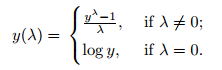

PowerTransformer seleziona automaticamente lambda stimando attraverso la massima verosimiglianza

Le feature selezionate sono correlate, ma si presume ciò non sia un problema nel clustering con k means ([fonte](https://www.quora.com/What-happens-when-you-pass-correlated-variables-to-a-k-means-clustering-Also-is-there-a-way-by-which-clustering-can-be-used-to-group-similar-pattern-observed-for-a-variable-over-time)). 
Inoltre, non è molto significativo raggruppare tutte le feature non correlate

In [67]:
scaling_mapper = DataFrameMapper(scaler, default=None, df_out=True)
data_cleaned_scaled = scaling_mapper.fit_transform(data_cleaned)
data_scaled = scaling_mapper.transform(data)

In [68]:
data_cleaned_scaled

AvgCheck    Income  NumTotalPurchases  MntTotal Age CustomerFor  \
ID                                                                       
5524   1.217130  0.340014           1.215416  1.321052  59        1703   
2174  -1.529942 -0.229412          -1.348257 -1.452185  62         857   
4141   0.399683  0.968542           1.024133  0.661824  51        1204   
6182  -1.260010 -1.238166          -0.879737 -1.123894  32         797   
5324   0.094285  0.347367           0.366777  0.177483  35        1053   
...         ...       ...                ...       ...  ..         ...   
8080  -1.447733 -1.229040          -1.639490 -1.544204  30        1573   
10870  1.393403  0.485787           0.602499  1.144608  49        1273   
7270   1.132274  0.285028           0.820591  1.073275  35        1047   
8235   0.441585  0.859557           1.121186  0.731884  60        1048   
9405  -0.299587  0.088141          -0.500678 -0.445691  62        1514   

      Education Marital_Status Kidhome Teenhome  ... HasPartner NumChildren  \
ID                                               ...                          
5524   Bachelor         Single       0        0  ...         No           0   
2174   Bachelor         Single       1        1  ...         No           2   
4141   Bachelor       Together       0        0  ...        Yes           0   
6182   Bachelor       Together       1        0  ...        Yes           1   
5324        PhD        Married       1        0  ...        Yes           1   
...         ...            ...     ...      ...  ...        ...         ...   
8080   Bachelor         Single       0        0  ...         No           0   
10870  Bachelor        Married       0        1  ...        Yes           1   
7270   Bachelor       Divorced       0        0  ...         No           0   
8235     Master       Together       0        1  ...        Yes           1   
9405        PhD        Married       1        1  ...        Yes           2   

      HasChildren percentWines percentMeat percentFruits percentFish  \
ID                                                                     
5524            0    39.270254   33.766234      5.442177   10.636982   
2174            1    40.740741   22.222222      3.703704    7.407407   
4141            0    54.896907   16.365979      6.314433   14.304124   
6182            1    20.754717   37.735849       7.54717   18.867925   
5324            1    40.995261   27.962085     10.189573   10.900474   
...           ...          ...         ...           ...         ...   
8080            0    22.727273   27.272727      4.545455   13.636364   
10870           1    52.870992   13.571961      3.206562    3.131991   
7270            0    73.166801   17.485898      3.867849    2.578566   
8235            1    50.771056   25.385528      3.558719    9.489917   
9405            1    48.837209   35.465116      1.744186    1.162791   

      percentSweets percentGold AcceptedTotal  
ID                                             
5524       5.442177    5.442177             1  
2174       3.703704   22.222222             0  
4141       2.706186    5.412371             0  
6182       5.660377    9.433962             0  
5324       6.398104    3.554502             0  
...             ...         ...           ...  
8080      18.181818   13.636364             0  
10870      8.799403    18.41909             0  
7270       0.966962    1.933924             1  
8235       3.558719    7.236062             0  
9405       0.581395   12.209302             1  

[2035 rows x 39 columns]

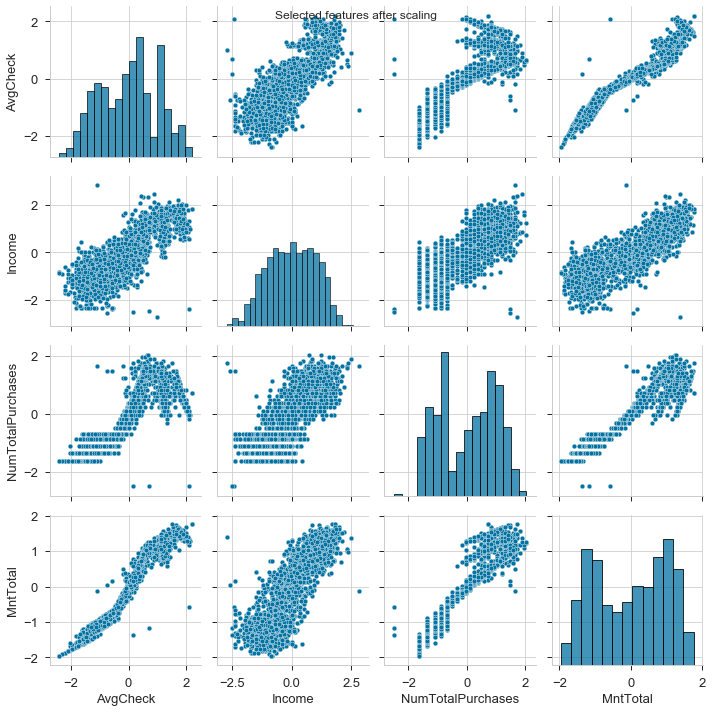

In [69]:
g = sns.pairplot(data=data_cleaned_scaled[SELECTED_FEATURES], 
             kind='scatter')
g.fig.suptitle('Selected features after scaling')

plt.tight_layout()

# Clustering

## DBScan

Estimated number of clusters: 4
Estimated number of noise points: 35
Silhouette Coefficient: -0.156


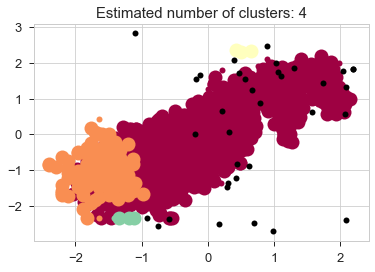

In [70]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

X = StandardScaler().fit_transform(data_cleaned_scaled[SELECTED_FEATURES])

# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=3).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

# #############################################################################

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

L'algoritmo è ovviamente sensibile a piccole variazioni degli iperparametri, eps e min_samples.

Una delle configurazioni migliori è qui rappresentata: individua 4 cluster. Il valore del Silhouette Coefficient vicino allo zero indica cluster sovrapposti.

Serve confrontare questi risultati con altri algoritmi che possano anche offrire una visualizzazione più intuitiva.

## Hierarchical Clustering


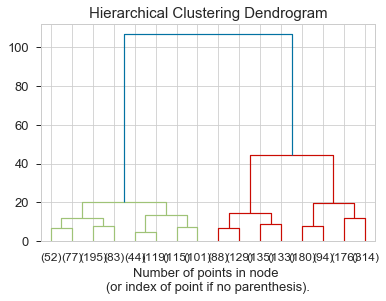

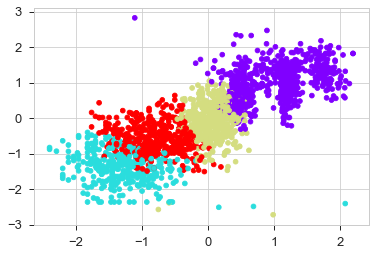

In [71]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


x = StandardScaler().fit_transform(data_cleaned_scaled[SELECTED_FEATURES])

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(x)

plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node \n(or index of point if no parenthesis).")
plt.show()

x = StandardScaler().fit_transform(data_cleaned_scaled[SELECTED_FEATURES])
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster.fit_predict(x)
plt.scatter(x[:,0],x[:,1], c=cluster.labels_, cmap='rainbow')

Il dendrogramma permette di comprendere la distribuzione dei campioni nei cluster individuati prima dell'unico cluster finale. 
Avendo individuato in 4 un probabile numero adeguato di cluster per il nostro dataset, l'algoritmo gerarchico mostra una distinzione più netta dei cluster rispetto a DBScan.

## K Means 

__Scegliere il numero di cluster__

Useremo il metodo elbow e la visualizzazione del punteggio della silhouette per scegliere il numero k di cluster ottimale

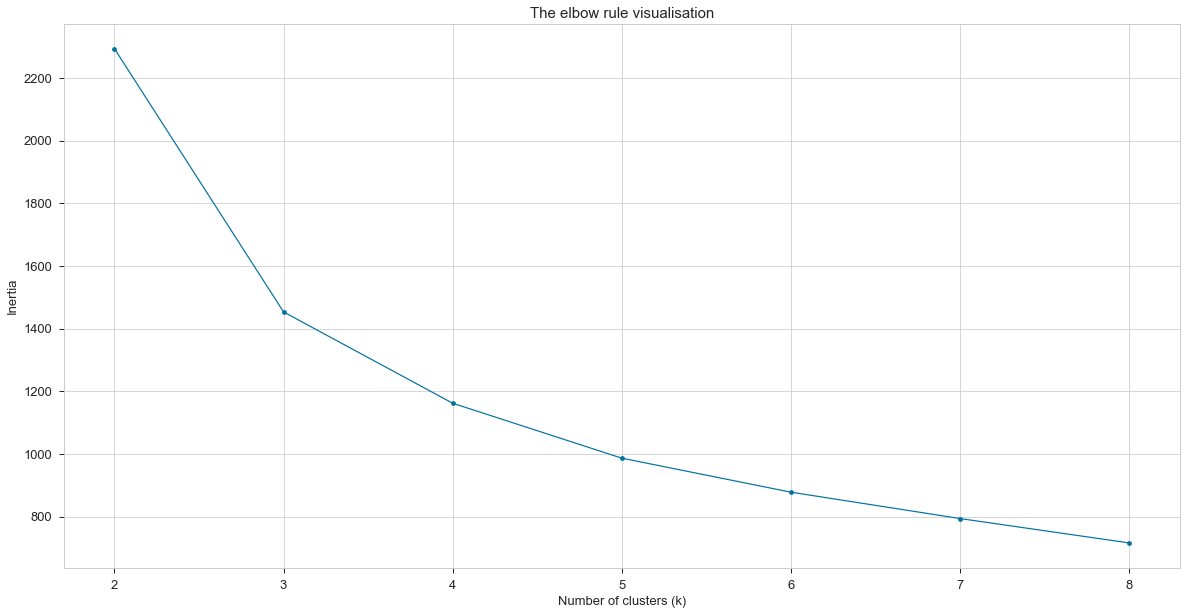

In [72]:
options = range(2,9)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters, random_state=42, init='k-means++').fit(data_cleaned_scaled[SELECTED_FEATURES])
    inertias.append(model.inertia_)

plt.figure(figsize=(20,10))    
plt.title("The elbow rule visualisation")
plt.plot(options, inertias, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia');

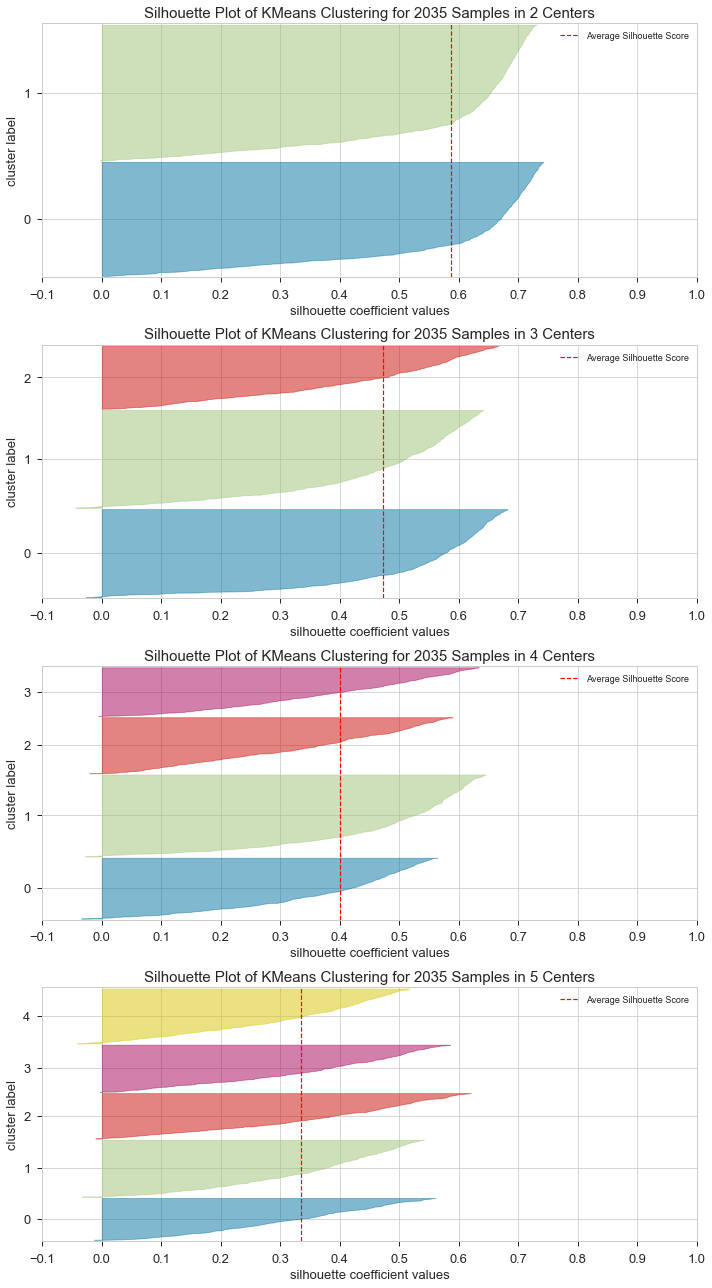

In [73]:
k_range = range(2, 6)
fig, axes = plt.subplots(4, 1, figsize=(10, 18))

for i in k_range:   
    model = KMeans(i, init='k-means++', n_init=100, random_state=42)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick', ax=axes[i-2])
    visualizer.fit(data_cleaned_scaled[SELECTED_FEATURES])
    visualizer.finalize()
    axes[i-2].set_xlim(-0.1, 1)
    
plt.tight_layout()


Secondo il metodo elbow, 4 o 5 potrebbe essere il numero ottimale di cluster

Osservando la visualizzazione del coefficiente di silhouette, 4 cluster forniscono punteggi di silhouette relativamente alti per ciascun cluster

In [74]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(data_cleaned_scaled[SELECTED_FEATURES])

pred = kmeans.predict(data_cleaned_scaled[SELECTED_FEATURES])

data_cleaned_clustered = data_cleaned.copy()
data_cleaned_clustered['Cluster'] = pred + 1

In [75]:
fig = px.scatter_3d(data_cleaned_clustered, x="Income", y="AvgCheck", z="MntTotal", color='Cluster', width=800, height=800)
fig.show()


__PCA visualisation__

In [76]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_cleaned_scaled[SELECTED_FEATURES])
pca_df = pd.DataFrame.from_records(data=pca_data, columns=["x1","x2"])
pca_df["Cluster"] = pred + 1

In [77]:
fig = px.scatter(pca_df, x="x1", y="x2", color='Cluster', width=800, height=800)
fig.show()

Il modello confonde un po' i cluster 2 e 3, ma non è un grosso problema 

Gli autovettori di PCA hanno descritto la varianza:

In [78]:
pca.explained_variance_ratio_

array([0.89877585, 0.06084716])

In [79]:
pca.explained_variance_ratio_.sum()

0.9596230054785256

Un autovettore spiega circa il 90% della varianza e ciò si verifica a causa di variabili correlate

Ora determiniamo la predizione per le label dei cluster su un dataset completo con valori anomali

In [80]:
full_preds = kmeans.predict(data_scaled[SELECTED_FEATURES])
data_clustered = data.copy()
data_clustered['Cluster'] = full_preds + 1

In [81]:
data_clustered

Age  CustomerFor Education Marital_Status    Income  Kidhome  Teenhome  \
ID                                                                              
5524    59         1703  Bachelor         Single   58138.0        0         0   
2174    62          857  Bachelor         Single   46344.0        1         1   
4141    51         1204  Bachelor       Together   71613.0        0         0   
6182    32          797  Bachelor       Together   26646.0        1         0   
5324    35         1053       PhD        Married   58293.0        1         0   
...    ...          ...       ...            ...       ...      ...       ...   
9432    39         1400  Bachelor       Together  666666.0        1         0   
10870   49         1273  Bachelor        Married   61223.0        0         1   
7270    35         1047  Bachelor       Divorced   56981.0        0         0   
8235    60         1048    Master       Together   69245.0        0         1   
9405    62         1514       PhD        Married   52869.0        1         1   

       Recency  MntWines  MntFruits  ...  percentWines  percentMeat  \
ID                                   ...                              
5524        58       635         88  ...     39.270254    33.766234   
2174        38        11          1  ...     40.740741    22.222222   
4141        26       426         49  ...     54.896907    16.365979   
6182        26        11          4  ...     20.754717    37.735849   
5324        94       173         43  ...     40.995261    27.962085   
...        ...       ...        ...  ...           ...          ...   
9432        23         9         14  ...     14.516129    29.032258   
10870       46       709         43  ...     52.870992    13.571961   
7270        91       908         48  ...     73.166801    17.485898   
8235         8       428         30  ...     50.771056    25.385528   
9405        40        84          3  ...     48.837209    35.465116   

       percentFruits  percentFish  percentSweets  percentGold  \
ID                                                              
5524        5.442177    10.636982       5.442177     5.442177   
2174        3.703704     7.407407       3.703704    22.222222   
4141        6.314433    14.304124       2.706186     5.412371   
6182        7.547170    18.867925       5.660377     9.433962   
5324       10.189573    10.900474       6.398104     3.554502   
...              ...          ...            ...          ...   
9432       22.580645    12.903226       1.612903    19.354839   
10870       3.206562     3.131991       8.799403    18.419090   
7270        3.867849     2.578566       0.966962     1.933924   
8235        3.558719     9.489917       3.558719     7.236062   
9405        1.744186     1.162791       0.581395    12.209302   

       NumTotalPurchases   AvgCheck  AcceptedTotal  Cluster  
ID                                                           
5524                  22  73.500000              1        3  
2174                   4   6.750000              0        1  
4141                  20  38.800000              0        2  
6182                   6   8.833333              0        1  
5324                  14  30.142857              0        2  
...                  ...        ...            ...      ...  
9432                   7   8.857143              0        3  
10870                 16  83.812500              0        3  
7270                  18  68.944444              1        2  
8235                  21  40.142857              0        2  
9405                   8  21.500000              1        4  

[2052 rows x 40 columns]

# Analisi dei Cluster 

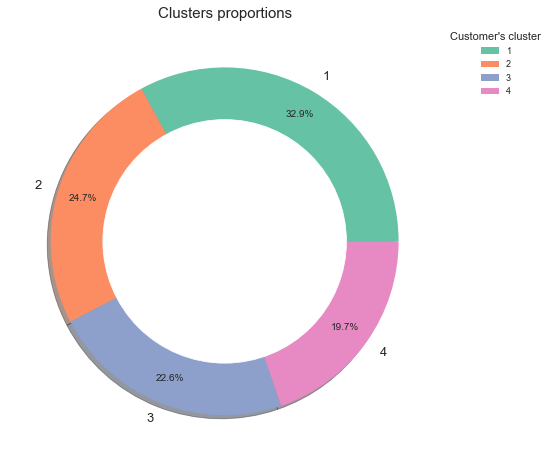

In [82]:
sizes = dict(data_clustered['Cluster'].value_counts())

plt.figure(figsize=(12, 8))
plt.title("Clusters proportions")
plt.pie(sizes.values(), labels=sorted(sizes.keys()), autopct="%.1f%%", pctdistance=0.85, shadow=True, colors=PALETTE)
plt.legend(title="Customer's cluster", labels=sorted(sizes.keys()), bbox_to_anchor=(1, 1))

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

Il cluster 1 è il cluster più grande, circa 1/3 di tutti i clienti. I cluster 2, 3 e 4 hanno circa le stesse dimensioni

## Income

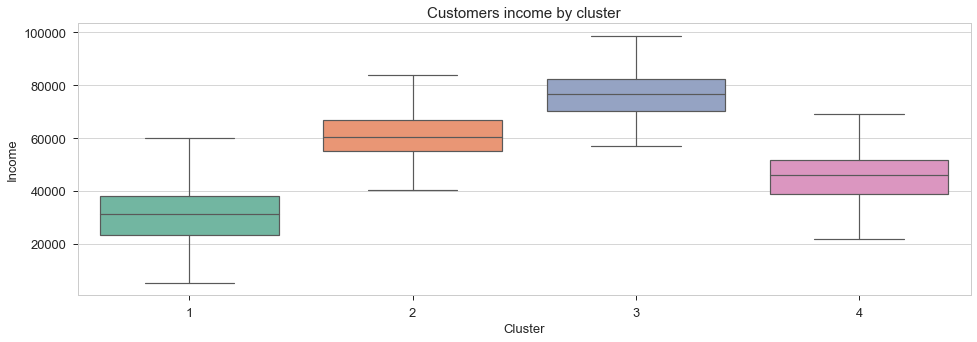

In [83]:
plt.figure(figsize=(16,5))
plt.title(f'Customers income by cluster')
ax = sns.boxplot(data=data_clustered, x='Cluster', y='Income', palette=PALETTE, showfliers=False)
plt.show()

Cluster 2: reddito alto

Cluster 1: reddito basso

Cluster 4: reddito nella media

Cluster 3: reddito molto alto

In [84]:
data_clustered.query('Income > 140000')

Age  CustomerFor Education Marital_Status    Income  Kidhome  Teenhome  \
ID                                                                             
8475   43         1069       PhD        Married  157243.0        0         1   
1503   40         1372       PhD       Together  162397.0        1         1   
1501   34         1704       PhD        Married  160803.0        0         0   
5336   45         1341    Master       Together  157733.0        1         0   
4931   39         1318  Bachelor       Together  157146.0        0         0   
9432   39         1400  Bachelor       Together  666666.0        1         0   

      Recency  MntWines  MntFruits  ...  percentWines  percentMeat  \
ID                                  ...                              
8475       98        20          2  ...      1.243781    98.383085   
1503       31        85          1  ...     79.439252    14.953271   
1501       21        55         16  ...      3.203262    94.467094   
5336       37        39          1  ...     66.101695    15.254237   
4931       13         1          0  ...      0.057803    99.710983   
9432       23         9         14  ...     14.516129    29.032258   

      percentFruits  percentFish  percentSweets  percentGold  \
ID                                                             
8475       0.124378     0.062189       0.124378     0.062189   
1503       0.934579     1.869159       0.934579     1.869159   
1501       0.931858     0.990099       0.174723     0.232964   
5336       1.694915     3.389831       0.000000    13.559322   
4931       0.000000     0.115607       0.057803     0.057803   
9432      22.580645    12.903226       1.612903    19.354839   

      NumTotalPurchases    AvgCheck  AcceptedTotal  Cluster  
ID                                                           
8475                 22   73.090909              0        3  
1503                  1  107.000000              0        3  
1501                 29   59.206897              0        3  
5336                  2   29.500000              0        3  
4931                 28   61.785714              0        3  
9432                  7    8.857143              0        3  

[6 rows x 40 columns]

E gli outlier di reddito sono distribuiti nel 3° cluster

## Average check

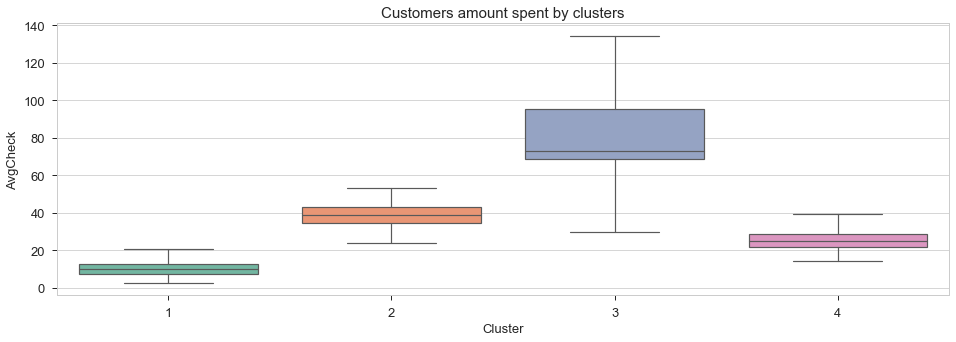

In [85]:
plt.figure(figsize=(16,5))
plt.title(f'Customers amount spent by clusters')
ax = sns.boxplot(data=data_clustered, x='Cluster', y='AvgCheck', palette=PALETTE, showfliers=False)
plt.show()

Average check corrisponde al reddito dei cluster, ma il divario tra il 3° cluster e gli altri è enorme

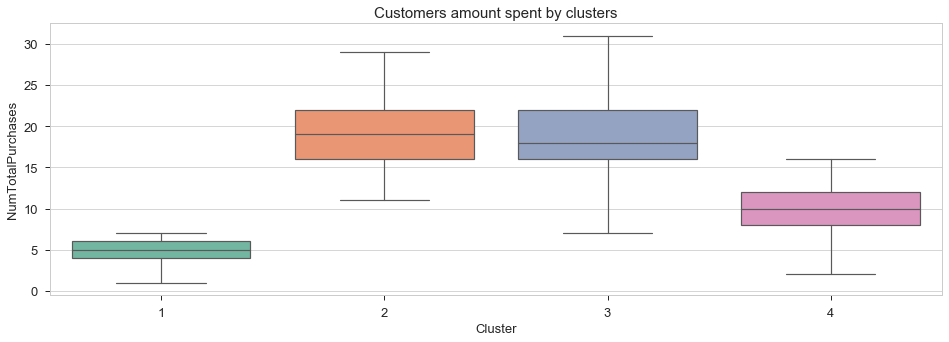

In [86]:
plt.figure(figsize=(16,5))
plt.title(f'Customers amount spent by clusters')
ax = sns.boxplot(data=data_clustered, x='Cluster', y='NumTotalPurchases', palette=PALETTE, showfliers=False)
plt.show()

I clienti del cluster 2 e 3 sono gli acquirenti più attivi e frequenti, il cluster 4 ha una frequenza media e il cluster 1 ha una bassa frequenza di acquisti

## Istruzione

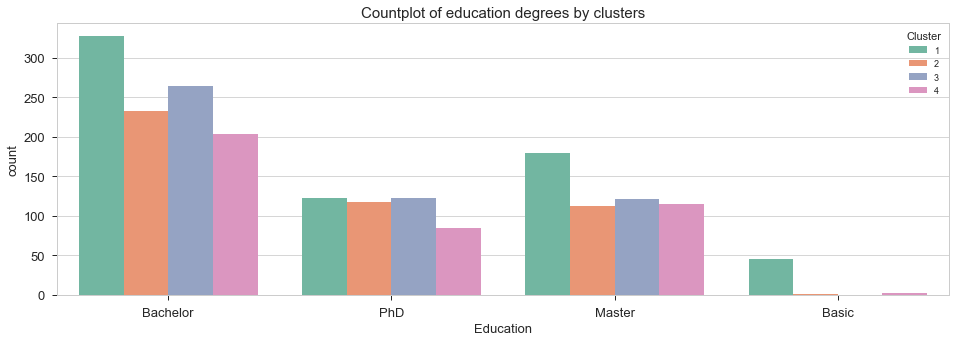

In [87]:
plt.figure(figsize=(16,5))
plt.title(f'Countplot of education degrees by clusters')
sns.countplot(data=data_clustered, x='Education', hue='Cluster', palette=PALETTE)
plt.show()

Coloro che non hanno titolo sono presenti principalmente nel 1° cluster

## Bambini

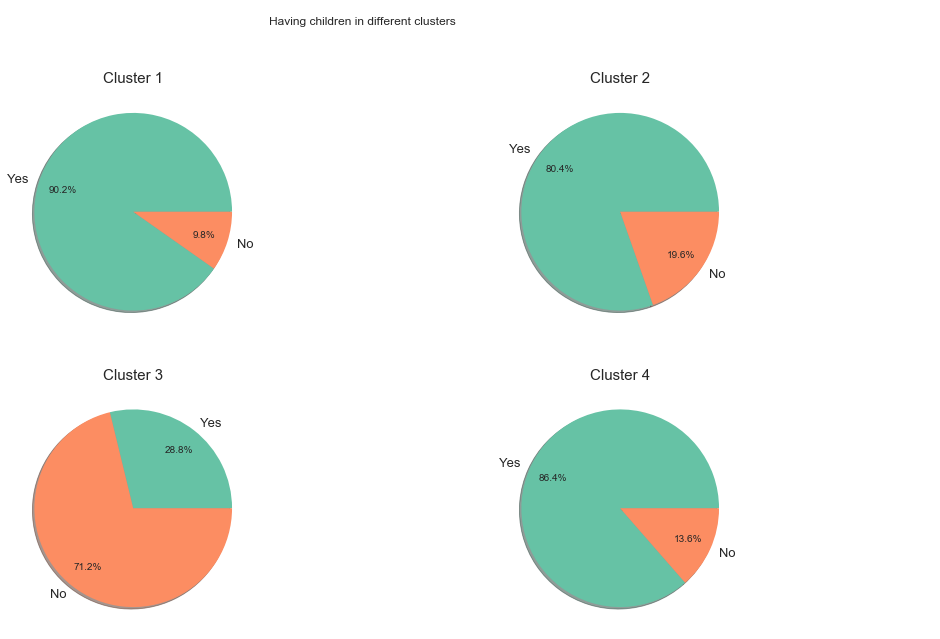

In [88]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))   
k = 0
for i in range(0, 2):
    for j in range(0, 2):
        k += 1
        sizes = dict(data_clustered.query(f'Cluster == {k}')['HasChildren'].value_counts().sort_index(ascending=False))
        axes[i, j].set_title(f"Cluster {k}")
        axes[i, j].pie(sizes.values(), labels=['Yes', 'No'], autopct="%.1f%%", pctdistance=0.75, shadow=True, colors=PALETTE)

fig.suptitle('Having children in different clusters')
fig.legend(title="Does the customer have children", labels=['Yes', 'No'], bbox_to_anchor=(1, 1)) 
fig.show()

Ci sono per lo più genitori nei cluster 1,2 e 4. E i clienti nel terzo cluster sono per lo più single

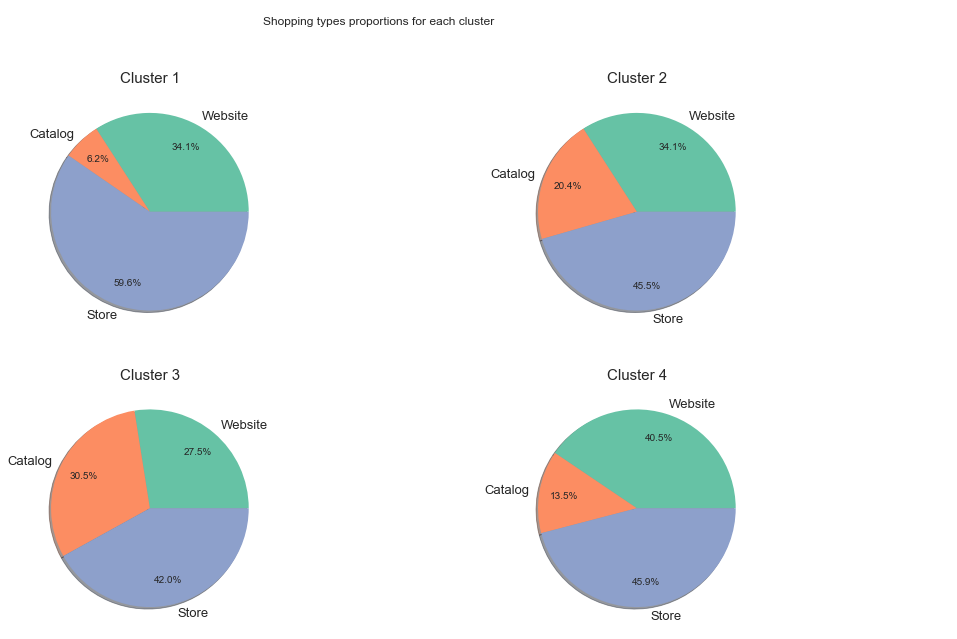

In [89]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))   
k = 0
for i in range(0, 2):
    for j in range(0, 2):
        k += 1
        num = data_clustered.query(f'Cluster == {k}').filter(regex='Num[^Deals|Total].+Purchases').sum(axis=0)
        sizes = dict(num)
        axes[i, j].set_title(f"Cluster {k}")
        axes[i, j].pie(sizes.values(), labels=['Website', 'Catalog', 'Store'], autopct="%.1f%%", pctdistance=0.75, shadow=True, colors=PALETTE)

fig.suptitle('Shopping types proportions for each cluster')
fig.legend(title="Shopping type", labels=['Website', 'Catalog', 'Store'], bbox_to_anchor=(1, 1)) 
fig.show()

I clienti appartenenti ai cluster 1 e 4 comprano dal catalogo meno, rispetto a quelli dei cluster 2 e 3.

Ora diamo un'occhiata al numero di visite al sito web per cluster

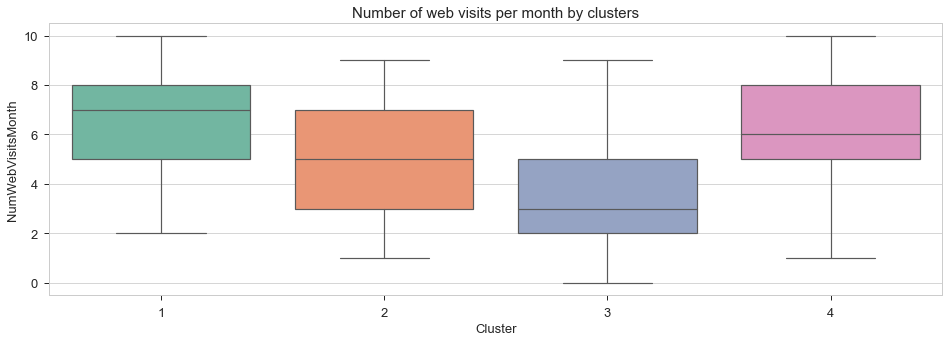

In [90]:
plt.figure(figsize=(16,5))
plt.title(f'Number of web visits per month by clusters')
ax = sns.boxplot(data=data_clustered, x='Cluster', y='NumWebVisitsMonth', palette=PALETTE, showfliers=False)
plt.show()

Il 1° e il 4° cluster visitano di più il sito web

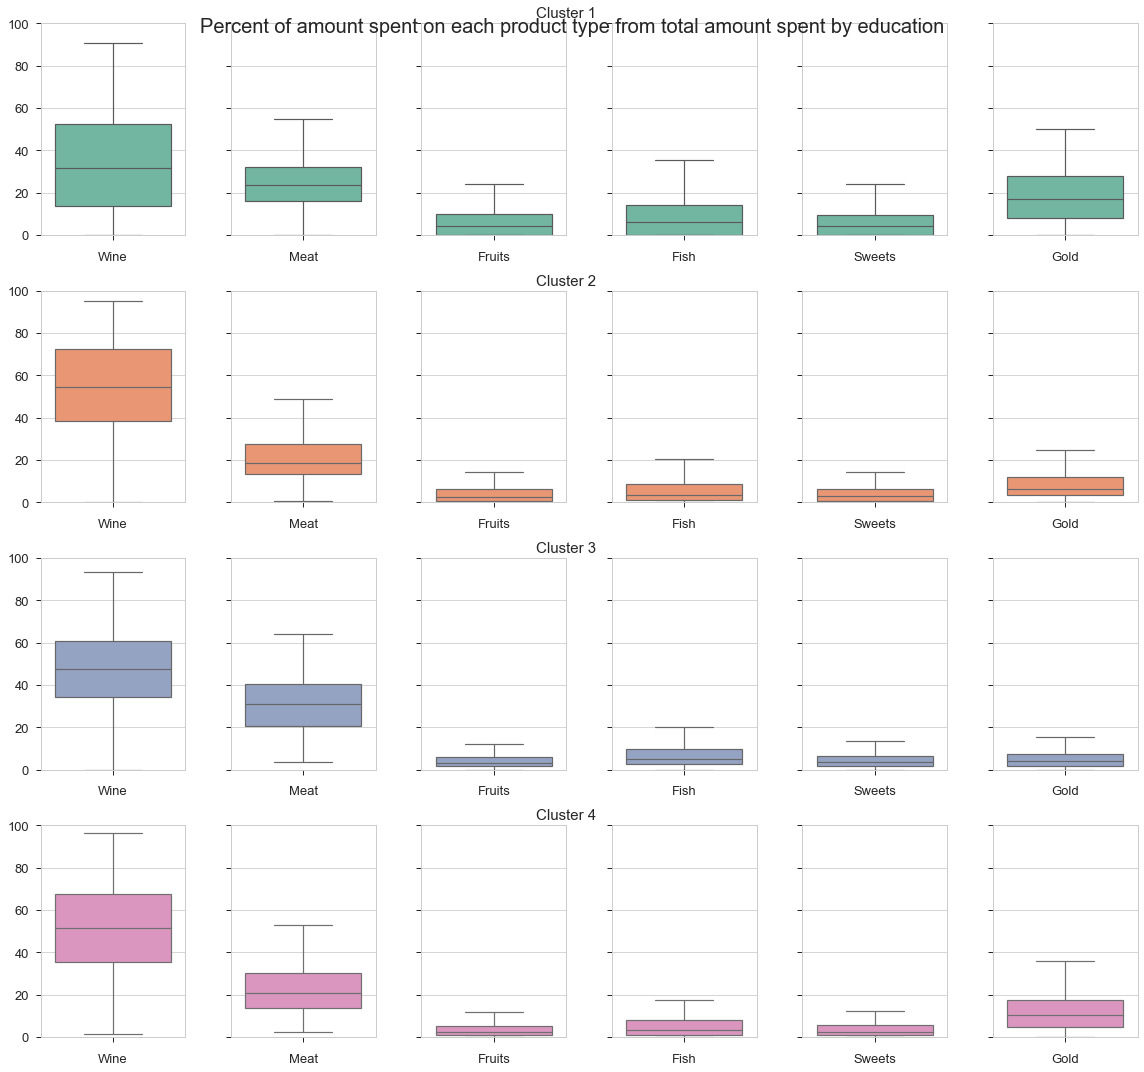

In [91]:
fig, axes = plt.subplots(4, 6, figsize=(16, 15), sharey=True)
fig.suptitle('Percent of amount spent on each product type from total amount spent by education', fontsize=20)

for i, value in enumerate(sorted(data_clustered['Cluster'].unique())):
    sns.boxplot(data=data_clustered.query(f'Cluster == {value}'), y='percentWines', showfliers=False, color=PALETTE[i], ax=axes[i, 0])
    axes[i, 0].set_ylim(0, 100)
    axes[i, 0].set_xlabel('Wine')
    axes[i, 0].set_ylabel('')
    
    sns.boxplot(data=data_clustered.query(f'Cluster == {value}'), y='percentMeat', showfliers=False, color=PALETTE[i], ax=axes[i, 1])
    axes[i, 1].set_xlabel('Meat')
    axes[i, 1].set_ylabel('')
    
    sns.boxplot(data=data_clustered.query(f'Cluster == {value}'), y='percentFruits', showfliers=False, color=PALETTE[i], ax=axes[i, 2])
    axes[i, 2].set_xlabel('Fruits')
    axes[i, 2].set_ylabel('')
    axes[i, 2].set_title(f'Cluster {value}', x=1)
    
    sns.boxplot(data=data_clustered.query(f'Cluster == {value}'), y='percentFish', showfliers=False, color=PALETTE[i], ax=axes[i, 3])
    axes[i, 3].set_xlabel('Fish')
    axes[i, 3].set_ylabel('')
    
    sns.boxplot(data=data_clustered.query(f'Cluster == {value}'), y='percentSweets', showfliers=False, color=PALETTE[i], ax=axes[i, 4])
    axes[i, 4].set_xlabel('Sweets')
    axes[i, 4].set_ylabel('')
    
    sns.boxplot(data=data_clustered.query(f'Cluster == {value}'), y='percentGold', showfliers=False, color=PALETTE[i], ax=axes[i, 5])
    axes[i, 5].set_xlabel('Gold')
    axes[i, 5].set_ylabel('')
    
plt.tight_layout()

Come si vede, le tipologie di prodotti popolari sono le stesse in tutti i cluster: vino e carne. Ma il cluster 3 compra carne più di altri. Il cluster 1 acquista prodotti in oro oltre a vino e carne

## Campagne accettate

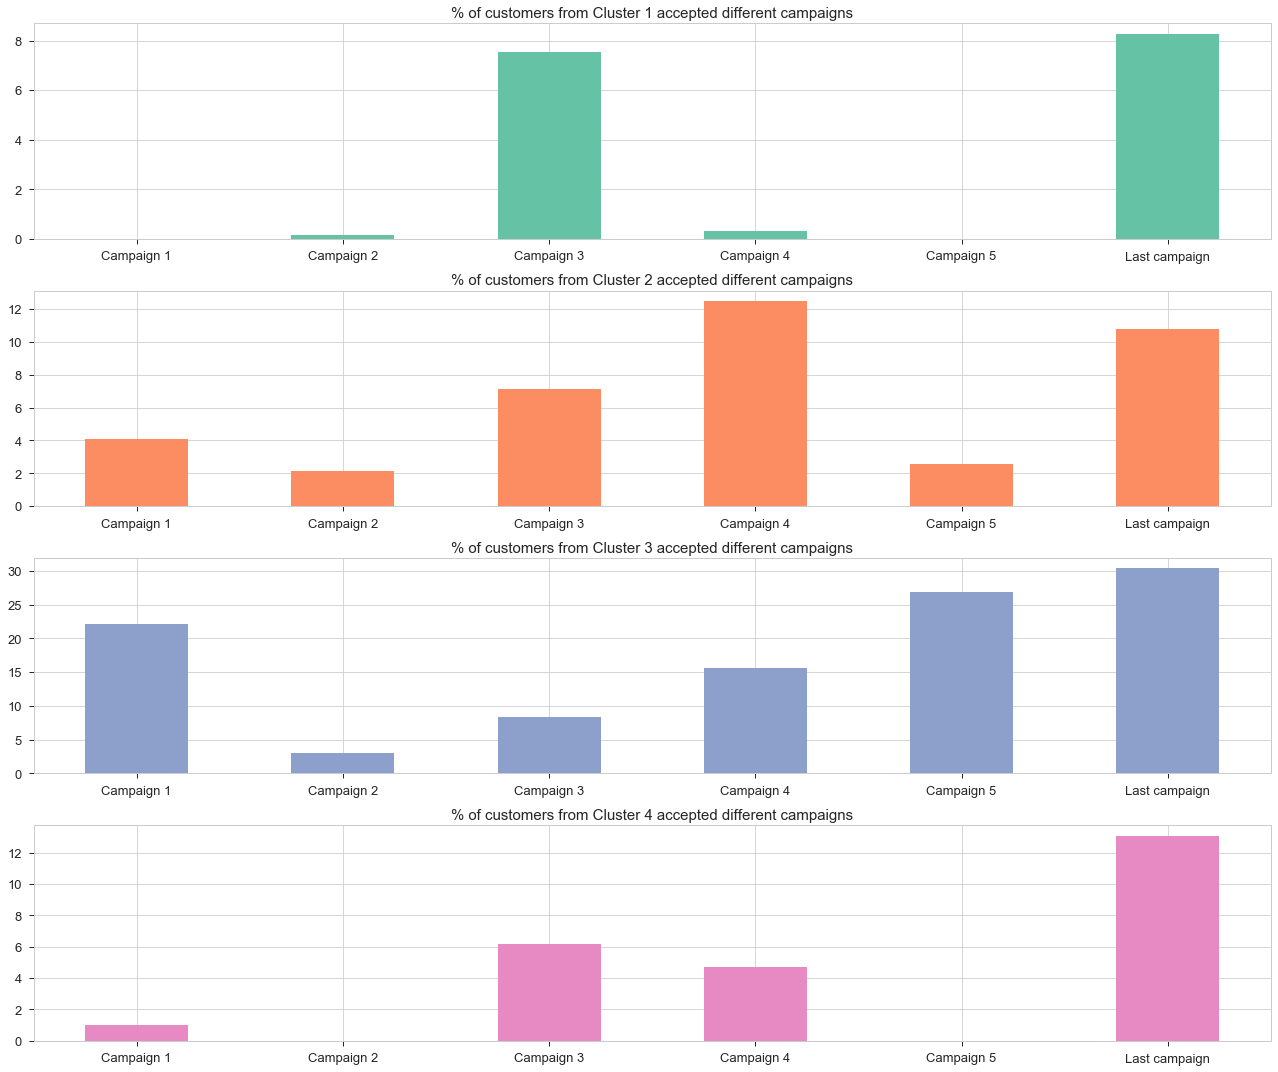

In [92]:
fig, axes = plt.subplots(4, 1, figsize=(16, 20))

for i in range(1, 5):
    ax = (data_clustered.query(f'Cluster == {i}')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]
          .sum() 
          .divide(data_clustered.query(f'Cluster == {i}').shape[0]).multiply(100)
          .plot(kind='bar', figsize=(18,15), title=f'% of customers from Cluster {i} accepted different campaigns', ax=axes[i-1], color=PALETTE[i-1]))
    ax.set_xticklabels(['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5', 'Last campaign'], rotation=0)
    
plt.tight_layout()

Notiamo che:

- Il maggiore interesse per la campagna 1 è stato riscontrato nei cluster 2 e 3
- La campagna 2 è stata poco efficace per tutti i cluster
- Il maggiore interesse per la campagna 3 è stato riscontrato nel cluster 1
- La campagna 4 ha avuto un discreto successo in tutti i cluster, tranne l'1
- Il maggiore interesse per la campagna 5 è stato riscontrato nel cluster 3
- L'ultima campagna è stata efficace per tutti i cluster

## Reclami

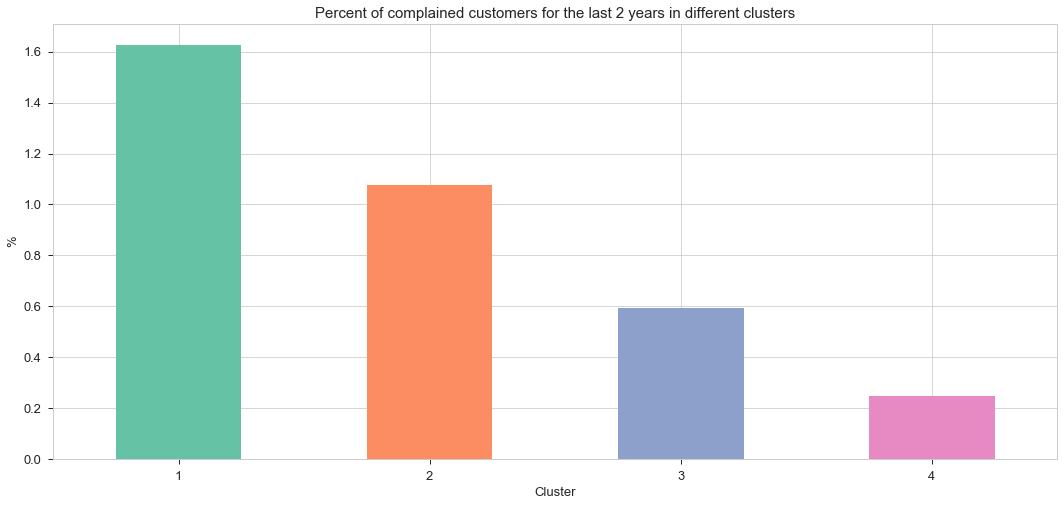

In [93]:
complains_by_cluster = (data_clustered.groupby(by='Cluster')['Complain'].sum()
                                      .divide(data_clustered['Cluster'].value_counts())
                                      .multiply(100))

ax = complains_by_cluster.plot(kind='bar', figsize=(18, 8), color=PALETTE[:4], 
                               title='Percent of complained customers for the last 2 years in different clusters',
                               ylabel='%', xlabel='Cluster')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.show()

Il cluster 1 acquista meno, ma si lamenta di più

# Risultati

Si potrebbero valutare i cluster in questo modo:
- Cluster 1 -> clienti __Platino__ 
- Cluster 4 -> clienti __Oro__ 
- Cluster 3 -> clienti __Argento__ 
- Cluster 2 -> clienti __Bronzo__ 


__Clienti Platino:__
- Reddito molto alto
- Average check molto alto
- Acquirenti frequenti
- Per lo più single
- Comprano per lo più da: store e catalogo, ma va bene anche il sito web
- Campagne più di successo: 1, 5, ultima
- Campagne di minor successo: 2
- Di rado visita il sito

__Clienti Oro:__
- Reddito alto
- Average check alto
- Acquirenti frequenti
- 80% sono genitori
- Comprano per lo più da: store e sito web
- Campagne più di successo: 4, ultima
- Campagne di minor successo: 2, 5

__Clienti Argento:__
- Reddito medio
- Average check medio
- Media frequenza di acquisto
- Per lo più genitori
- Comprano per lo più da: store e sito web
- Campagne più di successo: 3, ultima
- Campagne di minor successo: 1, 2, 5 

__Clienti Bronzo:__
- Reddito basso
- Average check basso
- Scarsa frequenza di acquisto
- Per lo più genitori
- Ci sono non laureati in questo cluster
- Comprano per lo più da: store e sito web
- Visitano più di tutti il sito
- Campagne più di successo: 3, ultima
- Campagne di minor successo: 1, 2, 4, 5 
- Fanno più reclami di tutti